---------------------------------------------------------------------------------------------------------------------------------
## Importing the Dataset




In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
diabetesData = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

#verify that the csv file is imported properly
diabetesData.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Observations made from a quick glance:
* There are `22` variables and `70692` samples in the dataset with no null values
* All the variables are identified as `float64`, even though there exists `boolean` type data (Diabetes_binary, PhysActivity etc.)
* None of the variables seem to have any missing value.

### Description of the dataset:

**Diabetes_binary:** Whether the respondent has diabetes <br>
> 1 indicates that the respondent has prediabetes or diabetes and 0 indicates that the respondent does not have diabetes<br> 

**HighBP:** Whether the respondent has high blood pressure <br>
> 1 indicates that the respondent has high blood pressure and 0 indicates that the respondent does not have high blood pressure

**HighChol:** Whether the respondent has high cholesterol <br>
> 1 indicates that the respondent has high cholesterol and 0 indicates that the respondent does not have high cholesterol

**CholCheck:** Whether the respondent has had a cholesterol check in the past 5 years
> 1 indicates that the respondent has had a cholesterol check in the past 5 years and 0 indicates that the respondent did not have a cholesterol check in the past 5 years

**BMI:** Body Mass Index (BMI) calculation of the respondent
> BMI is calculated by weight in kilograms divided by height in metres squared 

**Smoker:** Whether the respondent has smoked at least 100 cigarettes in his or her life
> 1 indicates that the respondent has smoked at least 100 cigarettes in his or her life and 0 indicates that the respondent has not smoked at least 100 cigarettes in his or her life

**Stroke:** Whether the respondent has had a stroke
> 1 indicates that the respondent has had a stroke and 0 indicated that the respondent did not have a stroke before

**HeartDiseaseorAttack:** Whether the respondent has coronary heart disease (CHD) or myocardial infarction (MI)
> 1 indicates that the respondent has either one of these heart diseases and 0 indicates that the respondent did not have either of these heart diseases

**PhysActivity:** Whether the respondent had participated in any form of physical activity in the past 30 days not including their job
>1 indicates that the respondent has participated in physical activity and 0 indicates that the respondent did not participate in any physical activity in the past 30 days not including their job

**Fruits:** Whether the respondent consumes fruit 1 or more times a day
> 1 indicates that the respondent consumes fruits 1 or more times a day and 0 indicates that the respondent does not consume fruits 1 or more times a day

**Veggies:** Whether the respondent consumes vegetable 1 or more times a day
> 1 indicates that the respondent consumes vegetables 1 or more times a day and 0 indicates that the respondent does not consume vegetables 1 or more times a day

**HvyAlcoholConsump:** Whether the respondent is a heavy drinker (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
> 1 indicates that the respondent is a heavy drinker and 0 indicates that the respondent is not a heavy drinker

**AnyHealthcare:** Whether the respondent has any kind of health care coverage (e.g. health insurance)
> 1 indicates that the respondent has health care coverage and 0 indicates that the respondent does not have any kind of health care coverage

**NoDocbcCost:** Whether there was a time in the past 12 months where the respondent needed to see a doctor but could not because of cost
> 1 indicates that there was a time in the past 12 months where the respondent needed to see a doctor but could not because of cost and 0 indicates that there was not a time in the past 12 months where the respondent needed to see a doctor but could not because of cost.

**GenHlth:**  What the respondent's health is in general from on a scale of 1-5
> 1 indicates excellent, 2 indicates very good, 3 indicares good, 4 indicates fair and 5 indicates poor

**MentHlth:** The number of days in the past 30 days where the respondent experienced poor mental health (inclusive of stress, depression, problems with emotions etc.)
> Scale of 1-30 days. 1 indicates 1 day where the respondent experienced poor mental health and 30 indicates 30 days where the respondent experienced poor mental health

**PhysHlth:** The number of days in the past 30 days where the respondent had poor physical health (inclusive of physical illness, injury etc.)
> Scale of 1-30 days. 1 indicates 1 day where the respondent had poor physical health and 30 indicates 30 days where the respondent had poor physical health

**DiffWalk:** Whether the repsondent has serious difficulty with walking or climbing stairs
> 1 indicates that the respondent has serious difficulty with walking or climbing stairs and 0 indicates that the respondent does not have serious difficulty with walking or climbing stairs

**Sex:** Whether the respondent is male or female
> 1 indicates that the respondent is male and 0 indicates that the respondent is female

**Age:** The respondent's age in categories with 6 year intervals
> 1 indicates that the respondent's age is in the 18-24 category, 2 indicates that the respondent's age is in the 25-29 category and 13 indicates that the respondent's age is >80, in the intervals of 5 years per category.

**Education:** The respondent's highest level of education on a scale of 1-6

> 1 indicates that the respondent never attended school or only attended kindergarten.  
> 2 indicates that the respondent attended Grades 1 through 8 (Elementary).  
> 3 indicates that the respondent attended Grades 9 through 11 (Some high school).  
> 4 indicates that the respondent attended Grade 12 or GED (High school graduate).  
> 5 indicates that the respondent attended College 1 year to 3 years (Some college or technical school).  
> 6 indicates that the respondent attended College 4 years or more (College graduate).


**Income:** The respondent's annual household income in categories with 5,000 intervals

> 1 indicates that the respondent's annual household income is less than 10,000.
> 2 indicates that the respondent's annual household income is more than 10,000 but less than 15,000.
> 8 indicates that the respondent's annual household income is more than 75,000. The interval is 5,000 per category.




In [5]:
diabetesData.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


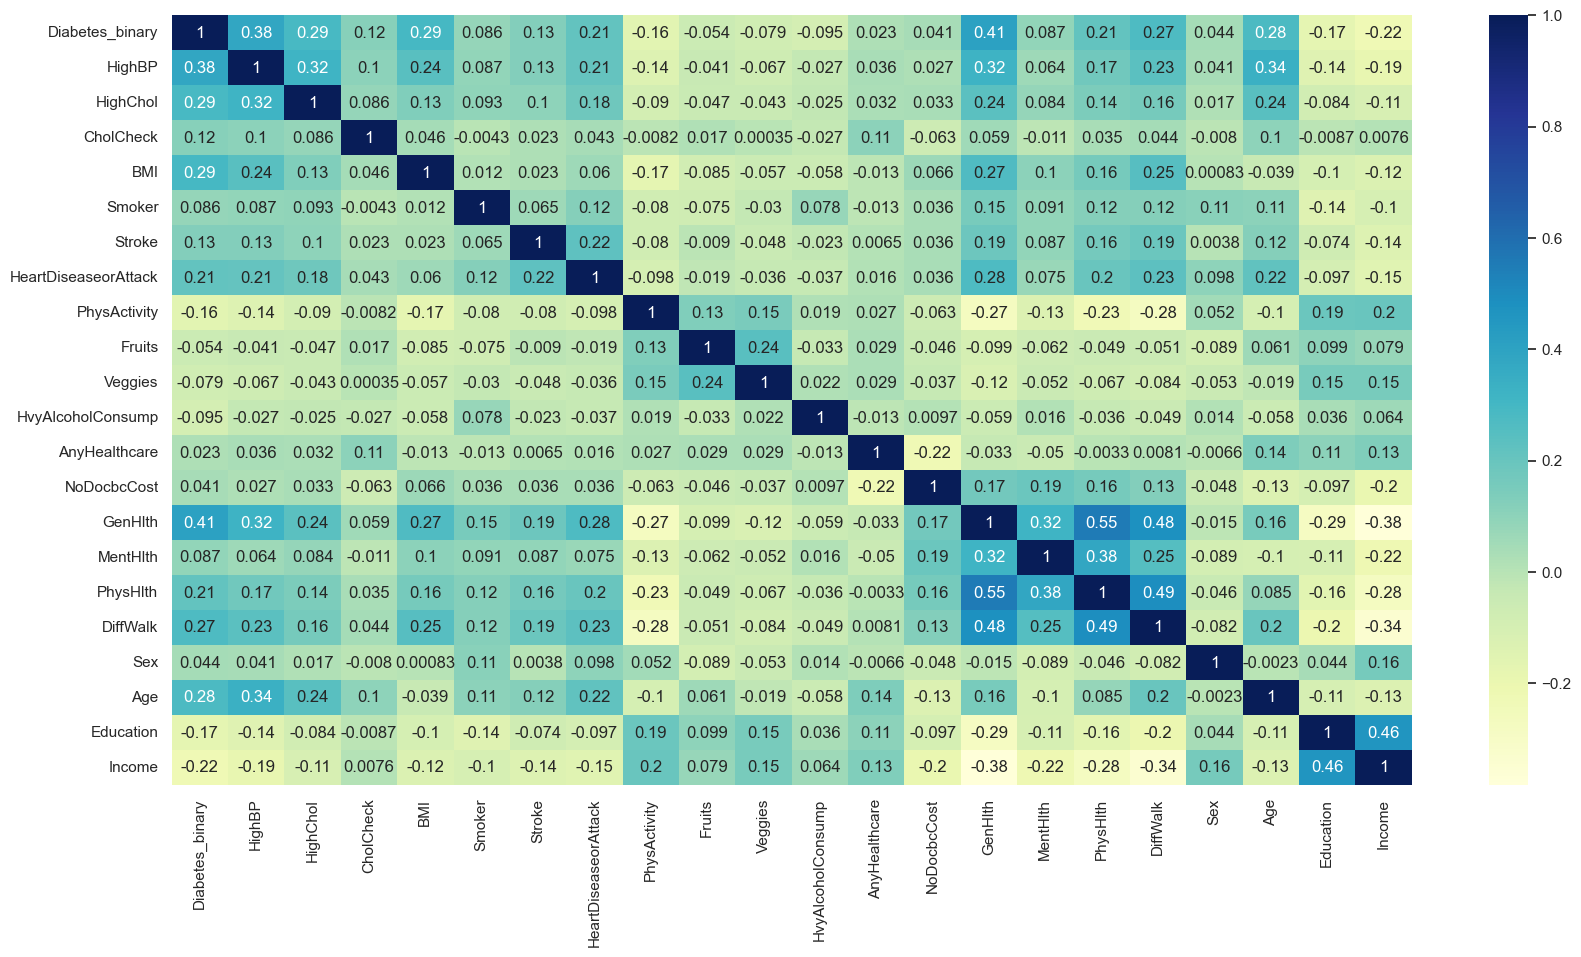

In [6]:
plt.figure(figsize=(20,10))
sb.heatmap(diabetesData.corr(), annot=True, cmap="YlGnBu")
plt.show()

This heatmap allows us to identify factors with stronger correlations to `Diabetes_binary`. The first row provides precise correlation coefficient values for these relationships. We isolated factors with correlation coefficients exceeding |0.2| as significant variables. 

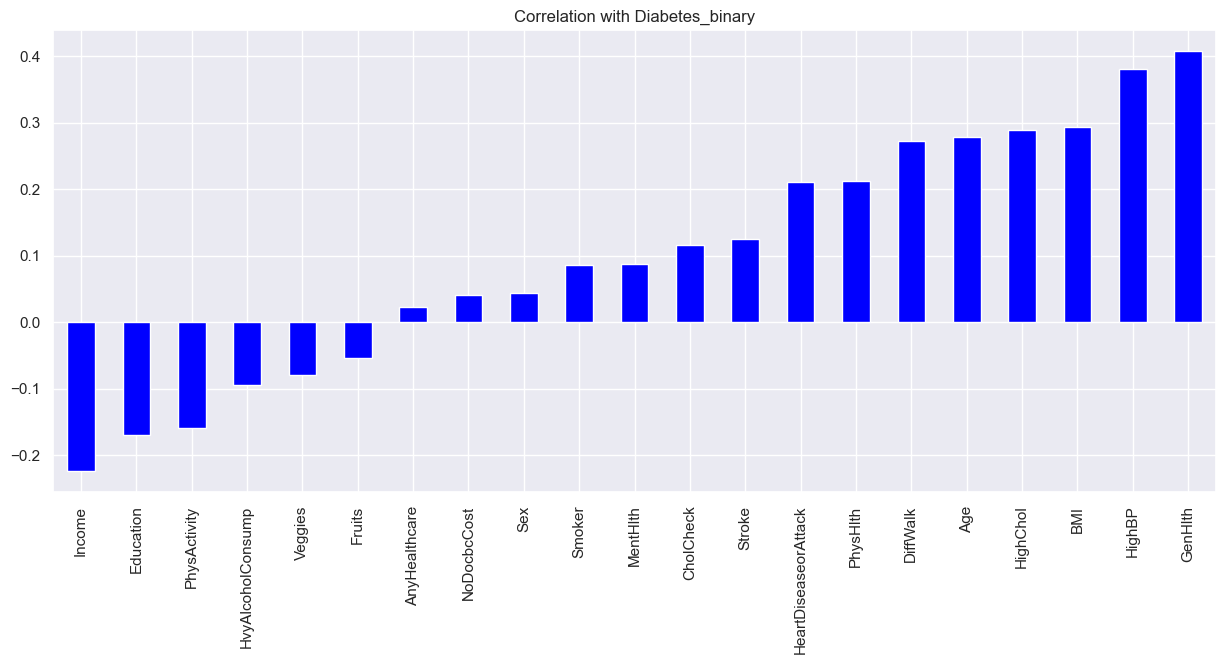

In [7]:
diabetesData.drop('Diabetes_binary', axis=1).corrwith(diabetesData.Diabetes_binary).sort_values().plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

Significant Risk Factor
- `GenHlth` (most significant)
- `HighBP`
- `BMI`
- `HighChol`
- `Age`
- `Income`
- `DiffWalk` 
- `PhysHlth` 

The bar graph allows us to easily filter out factors with correlation coefficients above |0.2| at one glance, indicating significant associations with `Diabetes_binary`. We considered correlation coefficients above |0.2| as significant, as they indicate moderate to strong associations with diabetes presence. Notably, `GenHlth` emerges as the most significant factor, strongly correlating with diabetes presence. `Income` is the only variable significantly negatively correlated with `Diabetes_binary`, suggesting that higher incomes relate to lower diabetes likelihood, possibly due to greater access to healthcare and other lifestyle factors.

In [41]:
#segmenting the significant numeric, binary and one-hot encoded data into datasets
binary_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'HighBP', 'HighChol','DiffWalk']])
numeric_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'BMI', 'PhysHlth']])
oneHot_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'GenHlth', 'Age', 'Income']])

In [42]:
#replacing the 1s and 0s in the binary dataset to True and False
binary_data.replace([1.0 ,0.0], [True, False], inplace = True)

In [10]:
#Checking to ensure that the replacement is correct
binary_data.head()

,Diabetes_binary,HighBP,HighChol,DiffWalk
0,False,True,False,False
1,False,True,True,False
2,False,False,False,False
3,False,True,True,False
4,False,False,False,False


---------------------------------------------------------------------------------------------------------------------------------

## Binary Data

### Binary Variables: HighBP, HighChol & DiffWalk

### Exploratory Data Analysis 
Statistical Exploration for `HighBP`, `HighChol` & `DiffWalk`

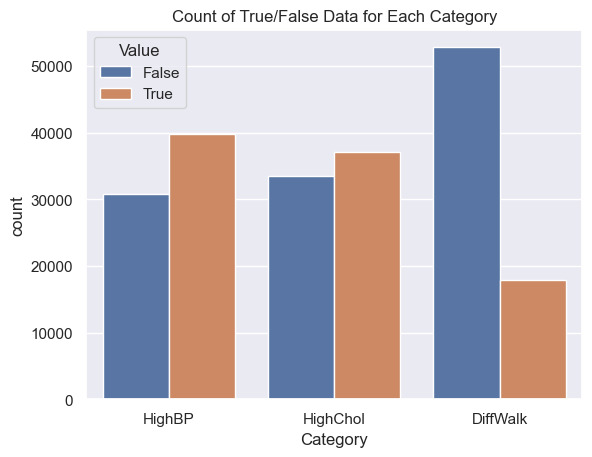

In [56]:
df = pd.DataFrame(binary_data[['HighBP', 'HighChol','DiffWalk']])

# Reshape the DataFrame
df_melted = df.melt(var_name='Category', value_name='Value')

# Plotting with Seaborn
sb.countplot(data=df_melted, x='Category', hue='Value')

# Adding title
plt.title('Count of True/False Data for Each Category')

# Show the plot
plt.show()

From the bar chart,
1. For `HighBP`, there is a slightly uneven split between the **_'True'_** and **_'False'_** data  
2. For `HighChol`, there is an even split between the **_'True'_** and **_'False'_** data
3. For `DiffWalk`, there is a severely uneven split between the **_'True'_** and **_'False'_** data

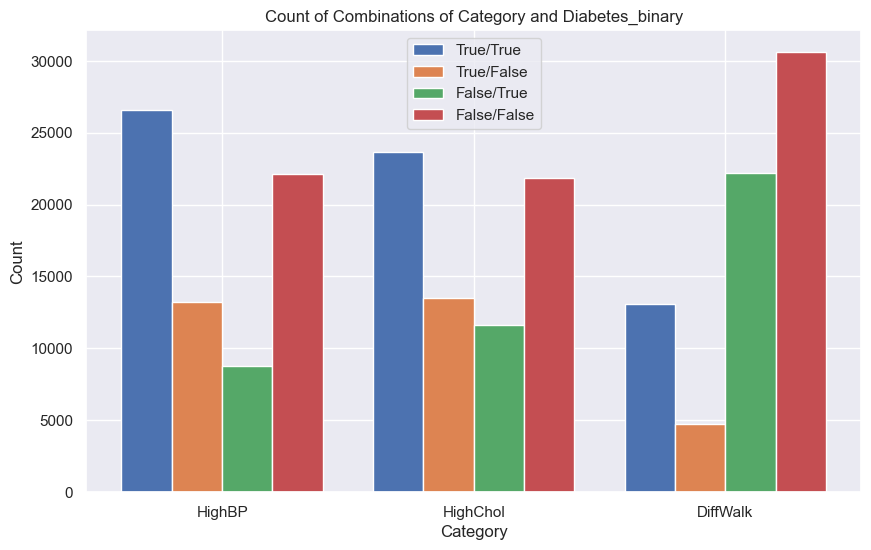

In [53]:
df = binary_data

# Initialize empty lists to store counts
counts_true_true = []
counts_true_false = []
counts_false_true = []
counts_false_false = []

# Loop through each category
for category in ['HighBP', 'HighChol', 'DiffWalk']:
    # Filter DataFrame based on category and Diabetes_binary values
    df_true_true = df[(df[category] == True) & (df['Diabetes_binary'] == True)]
    df_true_false = df[(df[category] == True) & (df['Diabetes_binary'] == False)]
    df_false_true = df[(df[category] == False) & (df['Diabetes_binary'] == True)]
    df_false_false = df[(df[category] == False) & (df['Diabetes_binary'] == False)]
    
    # Count occurrences for each combination
    counts_true_true.append(len(df_true_true))
    counts_true_false.append(len(df_true_false))
    counts_false_true.append(len(df_false_true))
    counts_false_false.append(len(df_false_false))

# Plotting
categories = ['HighBP', 'HighChol', 'DiffWalk']
labels = ['True/True', 'True/False', 'False/True', 'False/False']

# Creating bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(categories))

plt.bar(index, counts_true_true, bar_width, label='True/True')
plt.bar([i + bar_width for i in index], counts_true_false, bar_width, label='True/False')
plt.bar([i + 2*bar_width for i in index], counts_false_true, bar_width, label='False/True')
plt.bar([i + 3*bar_width for i in index], counts_false_false, bar_width, label='False/False')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Combinations of Category and Diabetes_binary')
plt.xticks([i + 1.5*bar_width for i in index], categories)
plt.legend()

# Show plot
plt.show()

From the bar chart,
1. For `HighBP`, 
- For **_'True'_** values, there are more respondents with **diabetes** _<<True/True>>_
- For **_'False'_** values, there are more respondents **without diabetes** _<<False/False>>_
2. For `HighChol`, 
- For **_'True'_** values, there are more respondents with **diabetes** _<<True/True>>_
- For **_'False'_** values, there are more drespondents **without diabetes** _<<False/False>>_
3. For `DiffWalk`,
- For **_'True'_** values, there are more respondents with **diabetes** _<<True/True>>_
- For **_'False'_** values, there are more respondents **without diabetes** _<<False/False>>_

Generally, for a respondent that has identified with these factors, the respondent would likely have **diabetes**.

### Support Vector Machine (SVM)

SVM is a classification approach to construct a hyperplane to separate different classes. The margin is defined as the perpendicular distance between the closest class point to the line which separates the different classes. SVM aims to select the best hyperplane with the greatest margin

Response Variable: `Diabetes_binary`<br>
Predictor Variable 1: `HighBP`<br>
Predictor Variable 2: `HighChol`<br>
Predictor Variable 3: `DiffWalk`<br>


The SVM algorithm relies on a technique called kernel trick by introducing dimensions to convert non-separable problems into separable problems.   

Since the dataset only has 4 repeated points, We chose to use **Linear Kernel** which is the dot product of any two given observations as it can be seperated by linear planes.   
1. Using the **Linear Kernel** SVM algorithm, we predict the values of the train and test dataset for `HighBP`, `HighChol` and `DiffWalk`
2. Compute the classification report for both the train and test dataset for `HighBP`, `HighChol` and `DiffWalk`
3. Compare the classification reports of all 3 predictor variables to determine the best binary variable to classify whether people have diabetes correctly

Index(['The Support Vector Machine is to predict Diabetes_binary based on HighBP'], dtype='object')

Train set: (53019, 1) (53019, 1)
Test set: (17673, 1) (17673, 1)

Index(['Classification Report for HighBP Train Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.72      0.63      0.67     26595
have diabetes       0.67      0.75      0.71     26424

     accuracy                           0.69     53019
    macro avg       0.69      0.69      0.69     53019
 weighted avg       0.69      0.69      0.69     53019


Index(['Classification Report for HighBP Test Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.71      0.62      0.66      8751
have diabetes       0.67      0.76      0.71      8922

     accuracy                           0.69     17673
    macro avg       0.69      0.69      0.69     17673
 weighted avg       0.69      0.69      0.69     17673

		Train Dataset
Tru

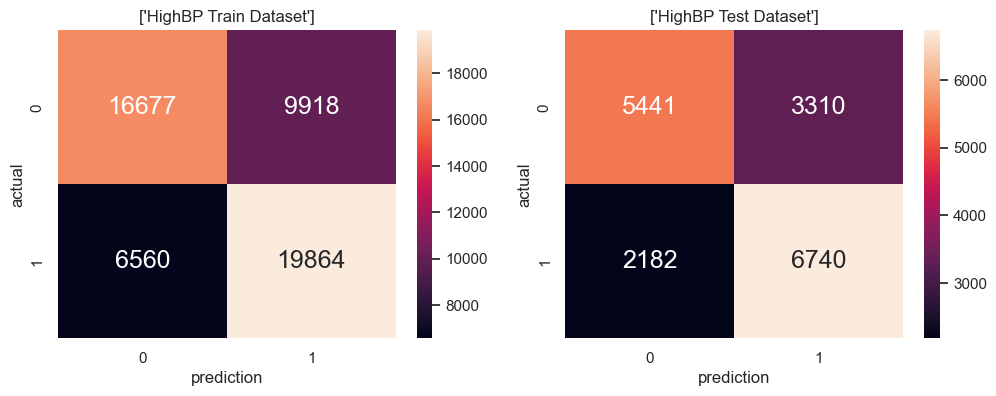

Index(['The Support Vector Machine is to predict Diabetes_binary based on HighChol'], dtype='object')

Train set: (53019, 1) (53019, 1)
Test set: (17673, 1) (17673, 1)

Index(['Classification Report for HighChol Train Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.65      0.62      0.63     26540
have diabetes       0.64      0.67      0.65     26479

     accuracy                           0.64     53019
    macro avg       0.64      0.64      0.64     53019
 weighted avg       0.64      0.64      0.64     53019


Index(['Classification Report for HighChol Test Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.65      0.63      0.64      8806
have diabetes       0.64      0.67      0.66      8867

     accuracy                           0.65     17673
    macro avg       0.65      0.65      0.65     17673
 weighted avg       0.65      0.65      0.65     17673

		Train Datas

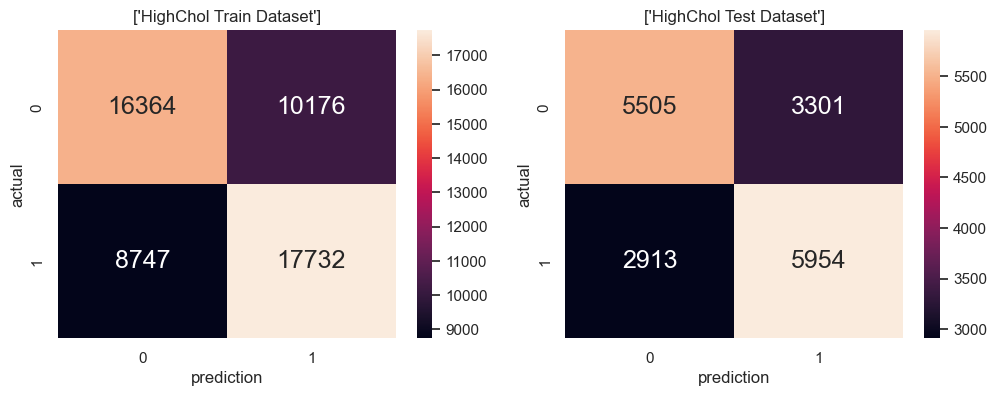

Index(['The Support Vector Machine is to predict Diabetes_binary based on DiffWalk'], dtype='object')

Train set: (53019, 1) (53019, 1)
Test set: (17673, 1) (17673, 1)

Index(['Classification Report for DiffWalk Train Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.58      0.86      0.69     26493
have diabetes       0.73      0.37      0.49     26526

     accuracy                           0.62     53019
    macro avg       0.65      0.62      0.59     53019
 weighted avg       0.65      0.62      0.59     53019


Index(['Classification Report for DiffWalk Test Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.58      0.87      0.70      8853
have diabetes       0.74      0.38      0.50      8820

     accuracy                           0.62     17673
    macro avg       0.66      0.62      0.60     17673
 weighted avg       0.66      0.62      0.60     17673

		Train Datas

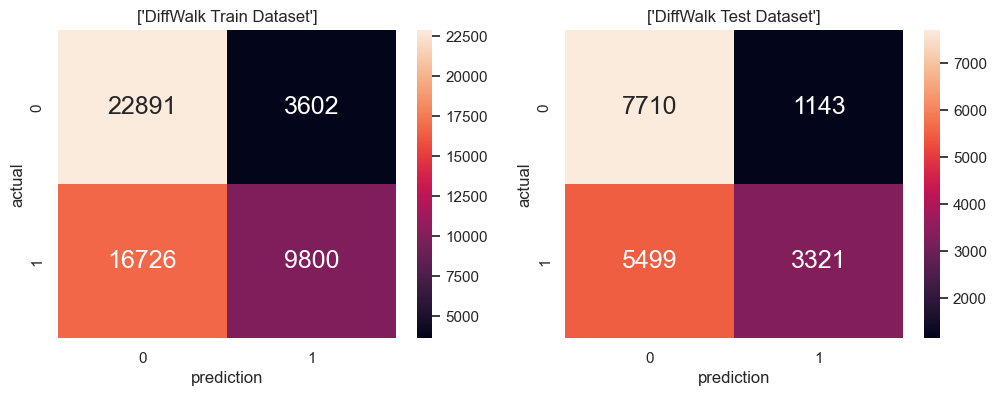

In [60]:
from sklearn import svm

highBP = pd.DataFrame(binary_data['HighBP'])
highChol = pd.DataFrame(binary_data['HighChol'])
DiffWalk = pd.DataFrame(binary_data['DiffWalk'])
diabetes_binary = pd.DataFrame(binary_data['Diabetes_binary'])


def SupportVectorMachine(predictor, response):
    print("The Support Vector Machine is to predict " + response.columns + " based on " + predictor.columns)
    print()
    
    #Segmenting the train and test data for both the predictor and response
    #Train set is 75% and Test set is 25%
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor, response, test_size = 0.25)
    print("Train set:", predictor_train.shape, response_train.shape)
    print("Test set:", predictor_test.shape, response_test.shape)
    print()
    
    #Create the SVM Object - Linear Kernel
    clf = svm.SVC(kernel = 'linear')
    
    #Train the model using the train set
    clf.fit(predictor_train, np.ravel(response_train.astype(int)))
    
    #Predict the response value for both the train and test datasets
    response_train_pred = clf.predict(predictor_train)
    response_test_pred = clf.predict(predictor_test)
    
    #Print the classification report
    target_names = ['no diabetes', 'have diabetes']
    print("Classification Report for " + predictor.columns + " Train Dataset")
    print(classification_report(response_train,response_train_pred, target_names = target_names))
    print()
    print("Classification Report for " + predictor.columns + " Test Dataset")
    print(classification_report(response_test,response_test_pred, target_names = target_names)) 
    
    #Calculating the FP and TP values
    train_matrix = confusion_matrix(response_train, response_train_pred)
    FP_train = train_matrix[0][1]
    TP_train = train_matrix[1][1]
    FN_train = train_matrix[1][0]
    TN_train = train_matrix[0][0]
    print("\t\tTrain Dataset")
    print("True Postive Rate: \t\t", TP_train/(FN_train + TP_train))
    print("False Positive Rate: \t\t", FP_train/(FP_train + TN_train))
    print()
    
    test_matrix = confusion_matrix(response_test, response_test_pred)
    FP_test = test_matrix[0][1]
    TP_test = test_matrix[1][1]
    FN_test = test_matrix[1][0]
    TN_test = test_matrix[0][0]
    print("\t\tTest Dataset")
    print("True Postive Rate: \t\t", TP_test/(FN_test + TP_test))
    print("False Positive Rate: \t\t", FP_test/(FP_test + TN_test))
    print()

    #Plot the Confusion Matrix for Train and Test
    test_matrix = confusion_matrix(response_test, response_test_pred)
    f, axes = plt.subplots(1, 2, figsize = (12,4))
    sb.heatmap(train_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[0])
    axes[0].set_title(predictor_test.columns.values + ' Train Dataset')
    axes[0].set_xlabel('prediction')
    axes[0].set_ylabel('actual')

    sb.heatmap(test_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[1])
    axes[1].set_title(predictor_test.columns.values + ' Test Dataset')
    axes[1].set_xlabel('prediction')
    axes[1].set_ylabel('actual')
    
    
    plt.show()

SupportVectorMachine(highBP,diabetes_binary)
SupportVectorMachine(highChol,diabetes_binary)
SupportVectorMachine(DiffWalk,diabetes_binary)

Comparing `HighBP`, `HighChol` and `DiffWalk`:

Within the **Train** dataset, 
1. `HighBP`, `HighChol` and `DiffWalk` have accuracies of **69%**, **64%** and **62%** 
2. `HighBP`, `HighChol` and `DiffWalk` have **67%**, **63%** and **69%** for F1 scores for _no diabetes_
3. `HighBP`, `HighChol` and `DiffWalk` have **71%**, **65%** and **49%** for F1 scores for _have diabetes_

Within the **Test** dataset,
1. `HighBP`, `HighChol` and `DiffWalk` have accuracies of **69%**, **65%** and **62%** 
2. `HighBP`, `HighChol` and `DiffWalk` have **66%**, **64%** and **70%** for F1 scores for _no diabetes_
3. `HighBP`, `HighChol` and `DiffWalk` have **71%**, **66%** and **50%** for F1 scores for _have diabetes_

This implies that `HighBP` is the most accurate predictor and is able to correctly identify the **diabetic** patients while making the least misclassifications of **non-diabetic** as **diabetic** as seen from the greatest accuracy and F1 score for _have diabetes_.    
Meanwhile, `HighChol` only has a moderate performance in terms of accuracy as well as identifying **diabetic** and **non-diabetic** as its F1 scores are not as high as `HighBP`.    
Even though `DiffWalk` has a lowest accuracy and the F1 score for **diabetic** is quite low, the F1 score for **non-diabetic** is quite high which suggests that `DiffWalk` classfies most of the dataset as **non-diabetic** which results in a better F1 score for **non-diabetic** but a worse F1 score for **diabetic**   
Overall, `HighBP` is the **best binary predictor** in the diabetic dataset to predict whether a person is **diabetic _correctly_**

---------------------------------------------------------------------------------------------------------------------------------

## Numerical Data
### Numerical Variables: PhysHlth & BMI

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split


### Exploratory Data Analysis 
1. Statistical Exploration for `PhysHlth`
2. Statistical Exploration for `BMI`

### Numerical Variable 1: PhysHlth [Exploratory Data Analysis]

<Axes: xlabel='PhysHlth', ylabel='Diabetes_binary'>

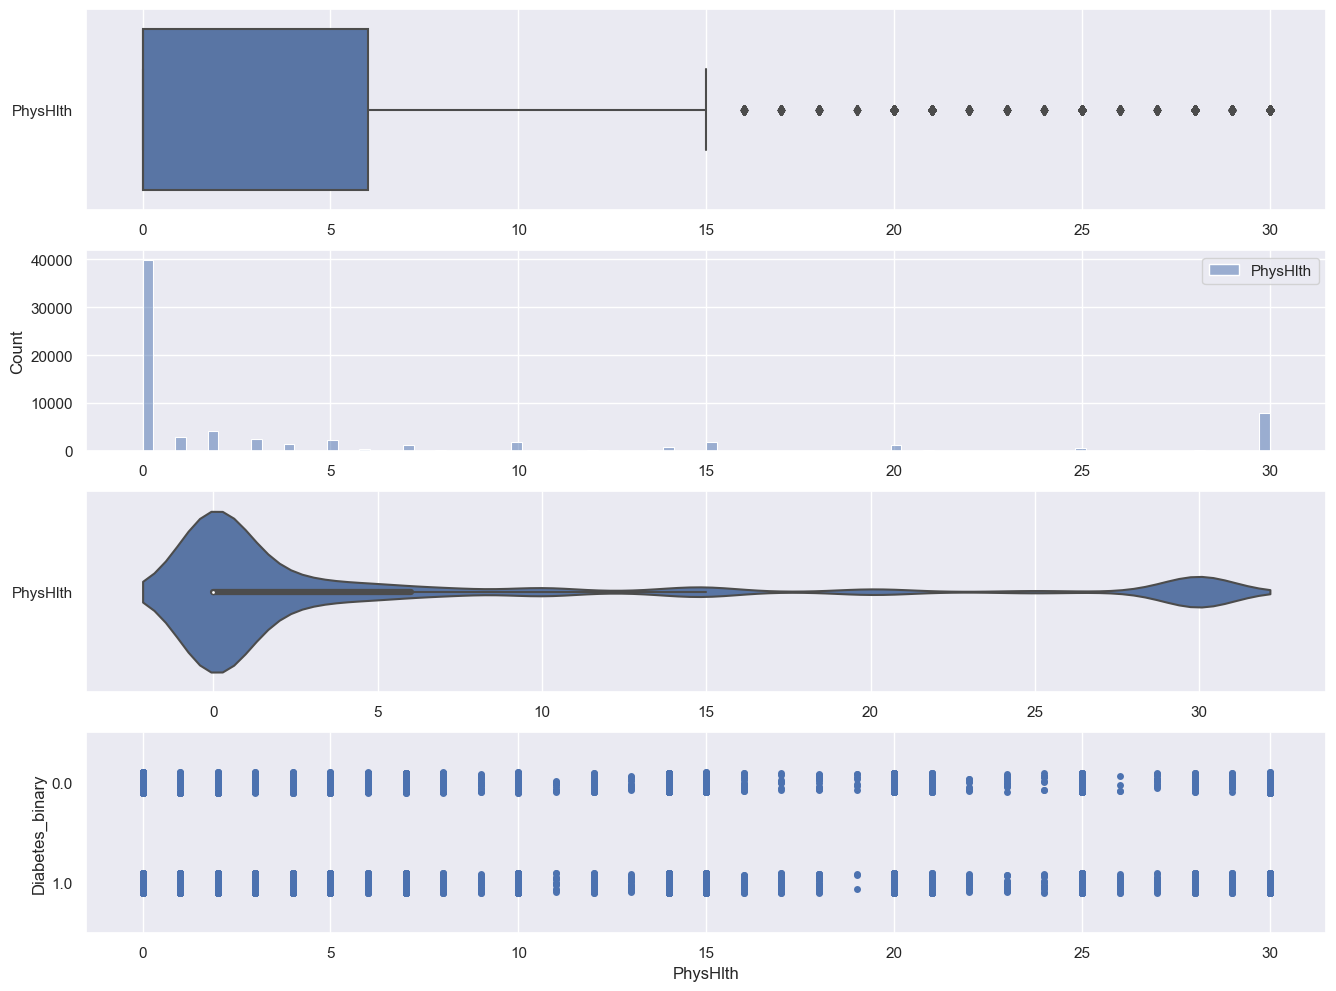

In [57]:
PhysHlth = pd.DataFrame(numeric_data['PhysHlth'])

f, axes = plt.subplots(4, 1, figsize=(16, 12))

# Plot the basic uni-variate figures for PhysHlth
sb.boxplot(data = PhysHlth, orient = "h", ax = axes[0])
sb.histplot(data = PhysHlth, ax = axes[1])
sb.violinplot(data = PhysHlth, orient = "h", ax = axes[2])
sb.stripplot(x = numeric_data['PhysHlth'], y = numeric_data['Diabetes_binary'], data = PhysHlth, orient = "h", ax = axes[3])


From the histogram plot, the data for `PhysHlth` is _heavily right skewed_, with approximately **30,000** respondents out of about **70,000** respondents indicating that they did not have a single day out of 30 days where they had poor physical health (illness or injury).

### Numerical Variable 2: BMI [Exploratory Data Analysis]

<Axes: xlabel='BMI', ylabel='Diabetes_binary'>

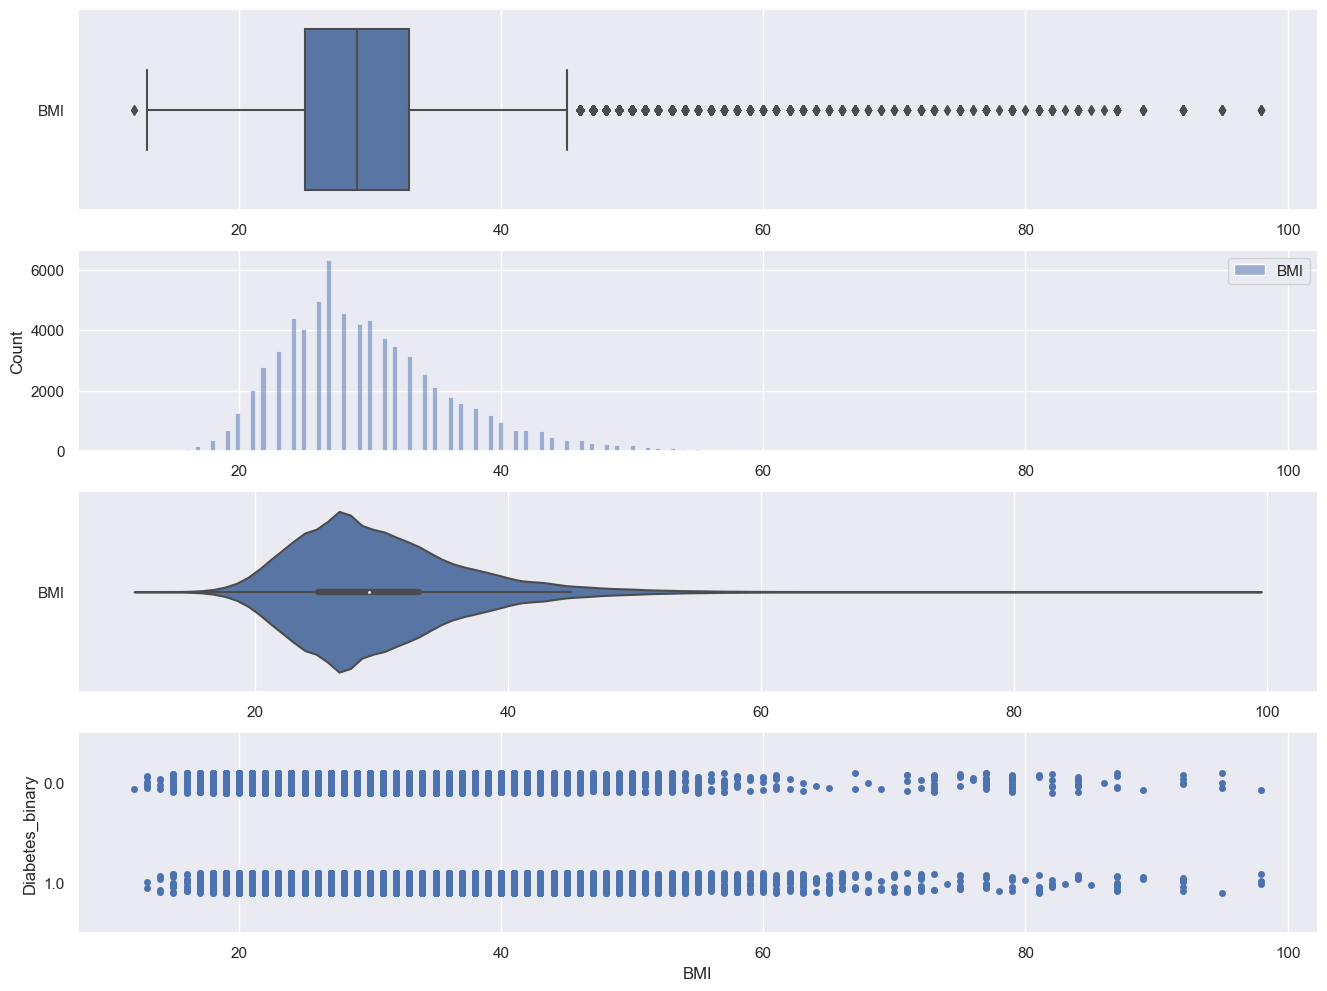

In [58]:
BMI = pd.DataFrame(numeric_data['BMI'])

f, axes = plt.subplots(4, 1, figsize=(16, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = BMI, orient = "h", ax = axes[0])
sb.histplot(data = BMI, ax = axes[1])
sb.violinplot(data = BMI, orient = "h", ax = axes[2])

#gives error when x is BMI and y is diabetes
sb.stripplot(x = numeric_data['BMI'], y = numeric_data['Diabetes_binary'], data = BMI, orient = "h", ax = axes[3])


From the histogram plot, the data for `BMI` is _slightly right-skewed_, characterized by a long right tail and a peak closer to the left side. This suggests that the majority of data points are **concentrated towards the lower end**,  with most of the respondents having a **BMI less than 40**. This shows that most of the collected data take on _lower_ values as opposed to _higher_ values. 



### Uni Variate Classification Tree
1. Uni Variate Classification Tree for `PhysHlth`
2. Uni Variate Classification Tree for `BMI`

### Numerical Variable 1: PhysHlth [Classification Tree]

DATA SET: [PhysHlth, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


[Text(0.42, 0.9, 'PhysHlth <= 4.5\ngini = 0.5\nsamples = 53019\nvalue = [26461, 26558]\nclass = diabetes'),
 Text(0.16, 0.7, 'PhysHlth <= 1.5\ngini = 0.492\nsamples = 37942\nvalue = [21427, 16515]\nclass = no diabetes'),
 Text(0.08, 0.5, 'PhysHlth <= 0.5\ngini = 0.488\nsamples = 31998\nvalue = [18526, 13472]\nclass = no diabetes'),
 Text(0.04, 0.3, 'gini = 0.488\nsamples = 29819\nvalue = [17249, 12570]\nclass = no diabetes'),
 Text(0.12, 0.3, 'gini = 0.485\nsamples = 2179\nvalue = [1277, 902]\nclass = no diabetes'),
 Text(0.24, 0.5, 'PhysHlth <= 2.5\ngini = 0.5\nsamples = 5944\nvalue = [2901, 3043]\nclass = diabetes'),
 Text(0.2, 0.3, 'gini = 0.5\nsamples = 3088\nvalue = [1557, 1531]\nclass = no diabetes'),
 Text(0.28, 0.3, 'PhysHlth <= 3.5\ngini = 0.498\nsamples = 2856\nvalue = [1344, 1512]\nclass = diabetes'),
 Text(0.24, 0.1, 'gini = 0.499\nsamples = 1848\nvalue = [883, 965]\nclass = diabetes'),
 Text(0.32, 0.1, 'gini = 0.496\nsamples = 1008\nvalue = [461, 547]\nclass = diabetes'),


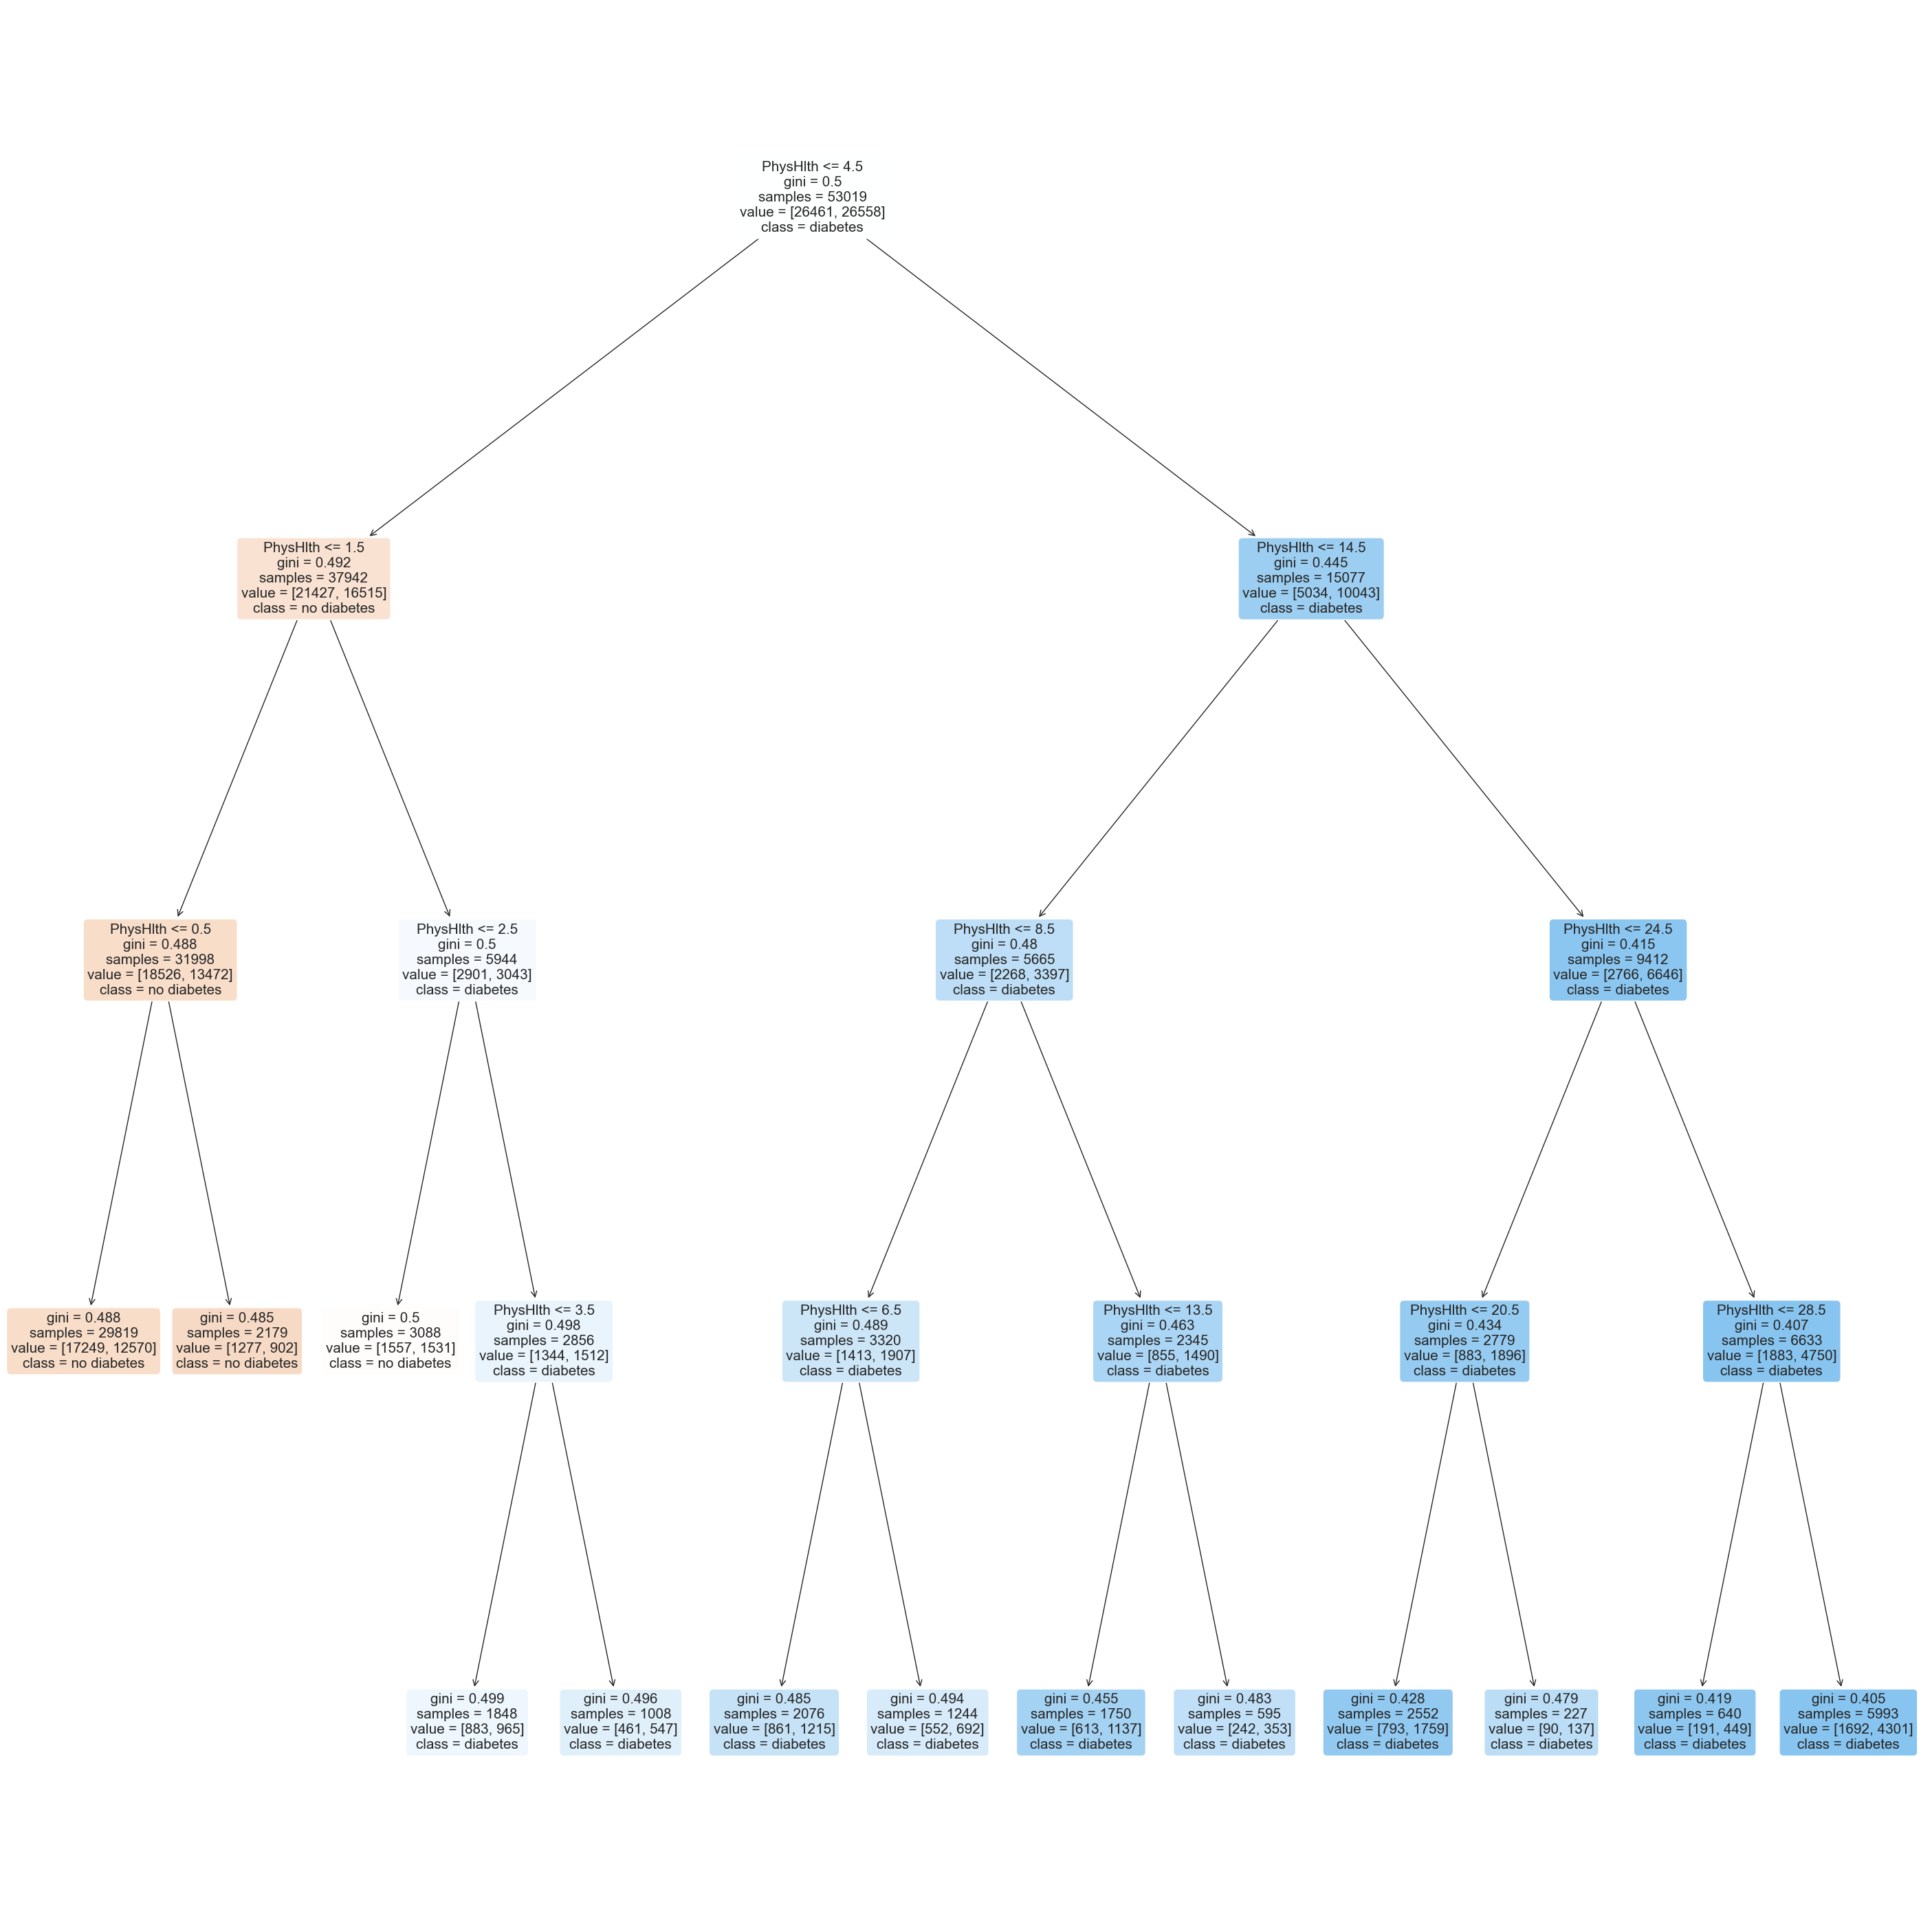

In [60]:
PhysHlth = pd.DataFrame(numeric_data['PhysHlth'])
diabetes_numerical = pd.DataFrame(numeric_data['Diabetes_binary'])

PhysHlth_train, PhysHlth_test, diabetes_numerical_train, diabetes_numerical_test = train_test_split(PhysHlth, diabetes_numerical, test_size = 0.25)
print("DATA SET: [PhysHlth, diabetes binary]")
print("Train Set :", PhysHlth_train.shape, diabetes_numerical_train.shape)
print("Test Set  :", PhysHlth_test.shape, diabetes_numerical_test.shape)

PhysHlth_train_DF = pd.concat([PhysHlth_train,diabetes_numerical_train], axis = 1).reindex(diabetes_numerical_train.index)

# PHYSHLTH DEC TREE
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(PhysHlth_train, diabetes_numerical_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["PhysHlth"], 
          class_names=["no diabetes","diabetes"])

From the leaf nodes of the classification tree, we can see that all the **Gini impurity** takes values of above **0.400**, with the lowest value being **0.405**. This suggests _high uncertainty_ in the nodes, as Gini impurity is a measure of the _likelihood of misclassifying a randomly chosen element_ if it were randomly labeled according to the distribution of labels in the node. In this instance, the classification tree would place **higher emphasis** on the prevalent class where `PhysHlth` == 0 as compared to the 29 other classes, due to the significant number of data points in this class.

### Numerical Variable 2: BMI [Classification Tree]

DATA SET: [BMI, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


[Text(0.45535714285714285, 0.9, 'BMI <= 27.5\ngini = 0.5\nsamples = 53019\nvalue = [26432, 26587]\nclass = diabetes'),
 Text(0.19642857142857142, 0.7, 'BMI <= 23.5\ngini = 0.45\nsamples = 22840\nvalue = [15041, 7799]\nclass = no diabetes'),
 Text(0.10714285714285714, 0.5, 'BMI <= 22.5\ngini = 0.369\nsamples = 8064\nvalue = [6094, 1970]\nclass = no diabetes'),
 Text(0.07142857142857142, 0.3, 'BMI <= 17.5\ngini = 0.356\nsamples = 5580\nvalue = [4288, 1292]\nclass = no diabetes'),
 Text(0.03571428571428571, 0.1, 'gini = 0.423\nsamples = 217\nvalue = [151, 66]\nclass = no diabetes'),
 Text(0.10714285714285714, 0.1, 'gini = 0.353\nsamples = 5363\nvalue = [4137, 1226]\nclass = no diabetes'),
 Text(0.14285714285714285, 0.3, 'gini = 0.397\nsamples = 2484\nvalue = [1806, 678]\nclass = no diabetes'),
 Text(0.2857142857142857, 0.5, 'BMI <= 25.5\ngini = 0.478\nsamples = 14776\nvalue = [8947, 5829]\nclass = no diabetes'),
 Text(0.21428571428571427, 0.3, 'BMI <= 24.5\ngini = 0.455\nsamples = 6267\nv

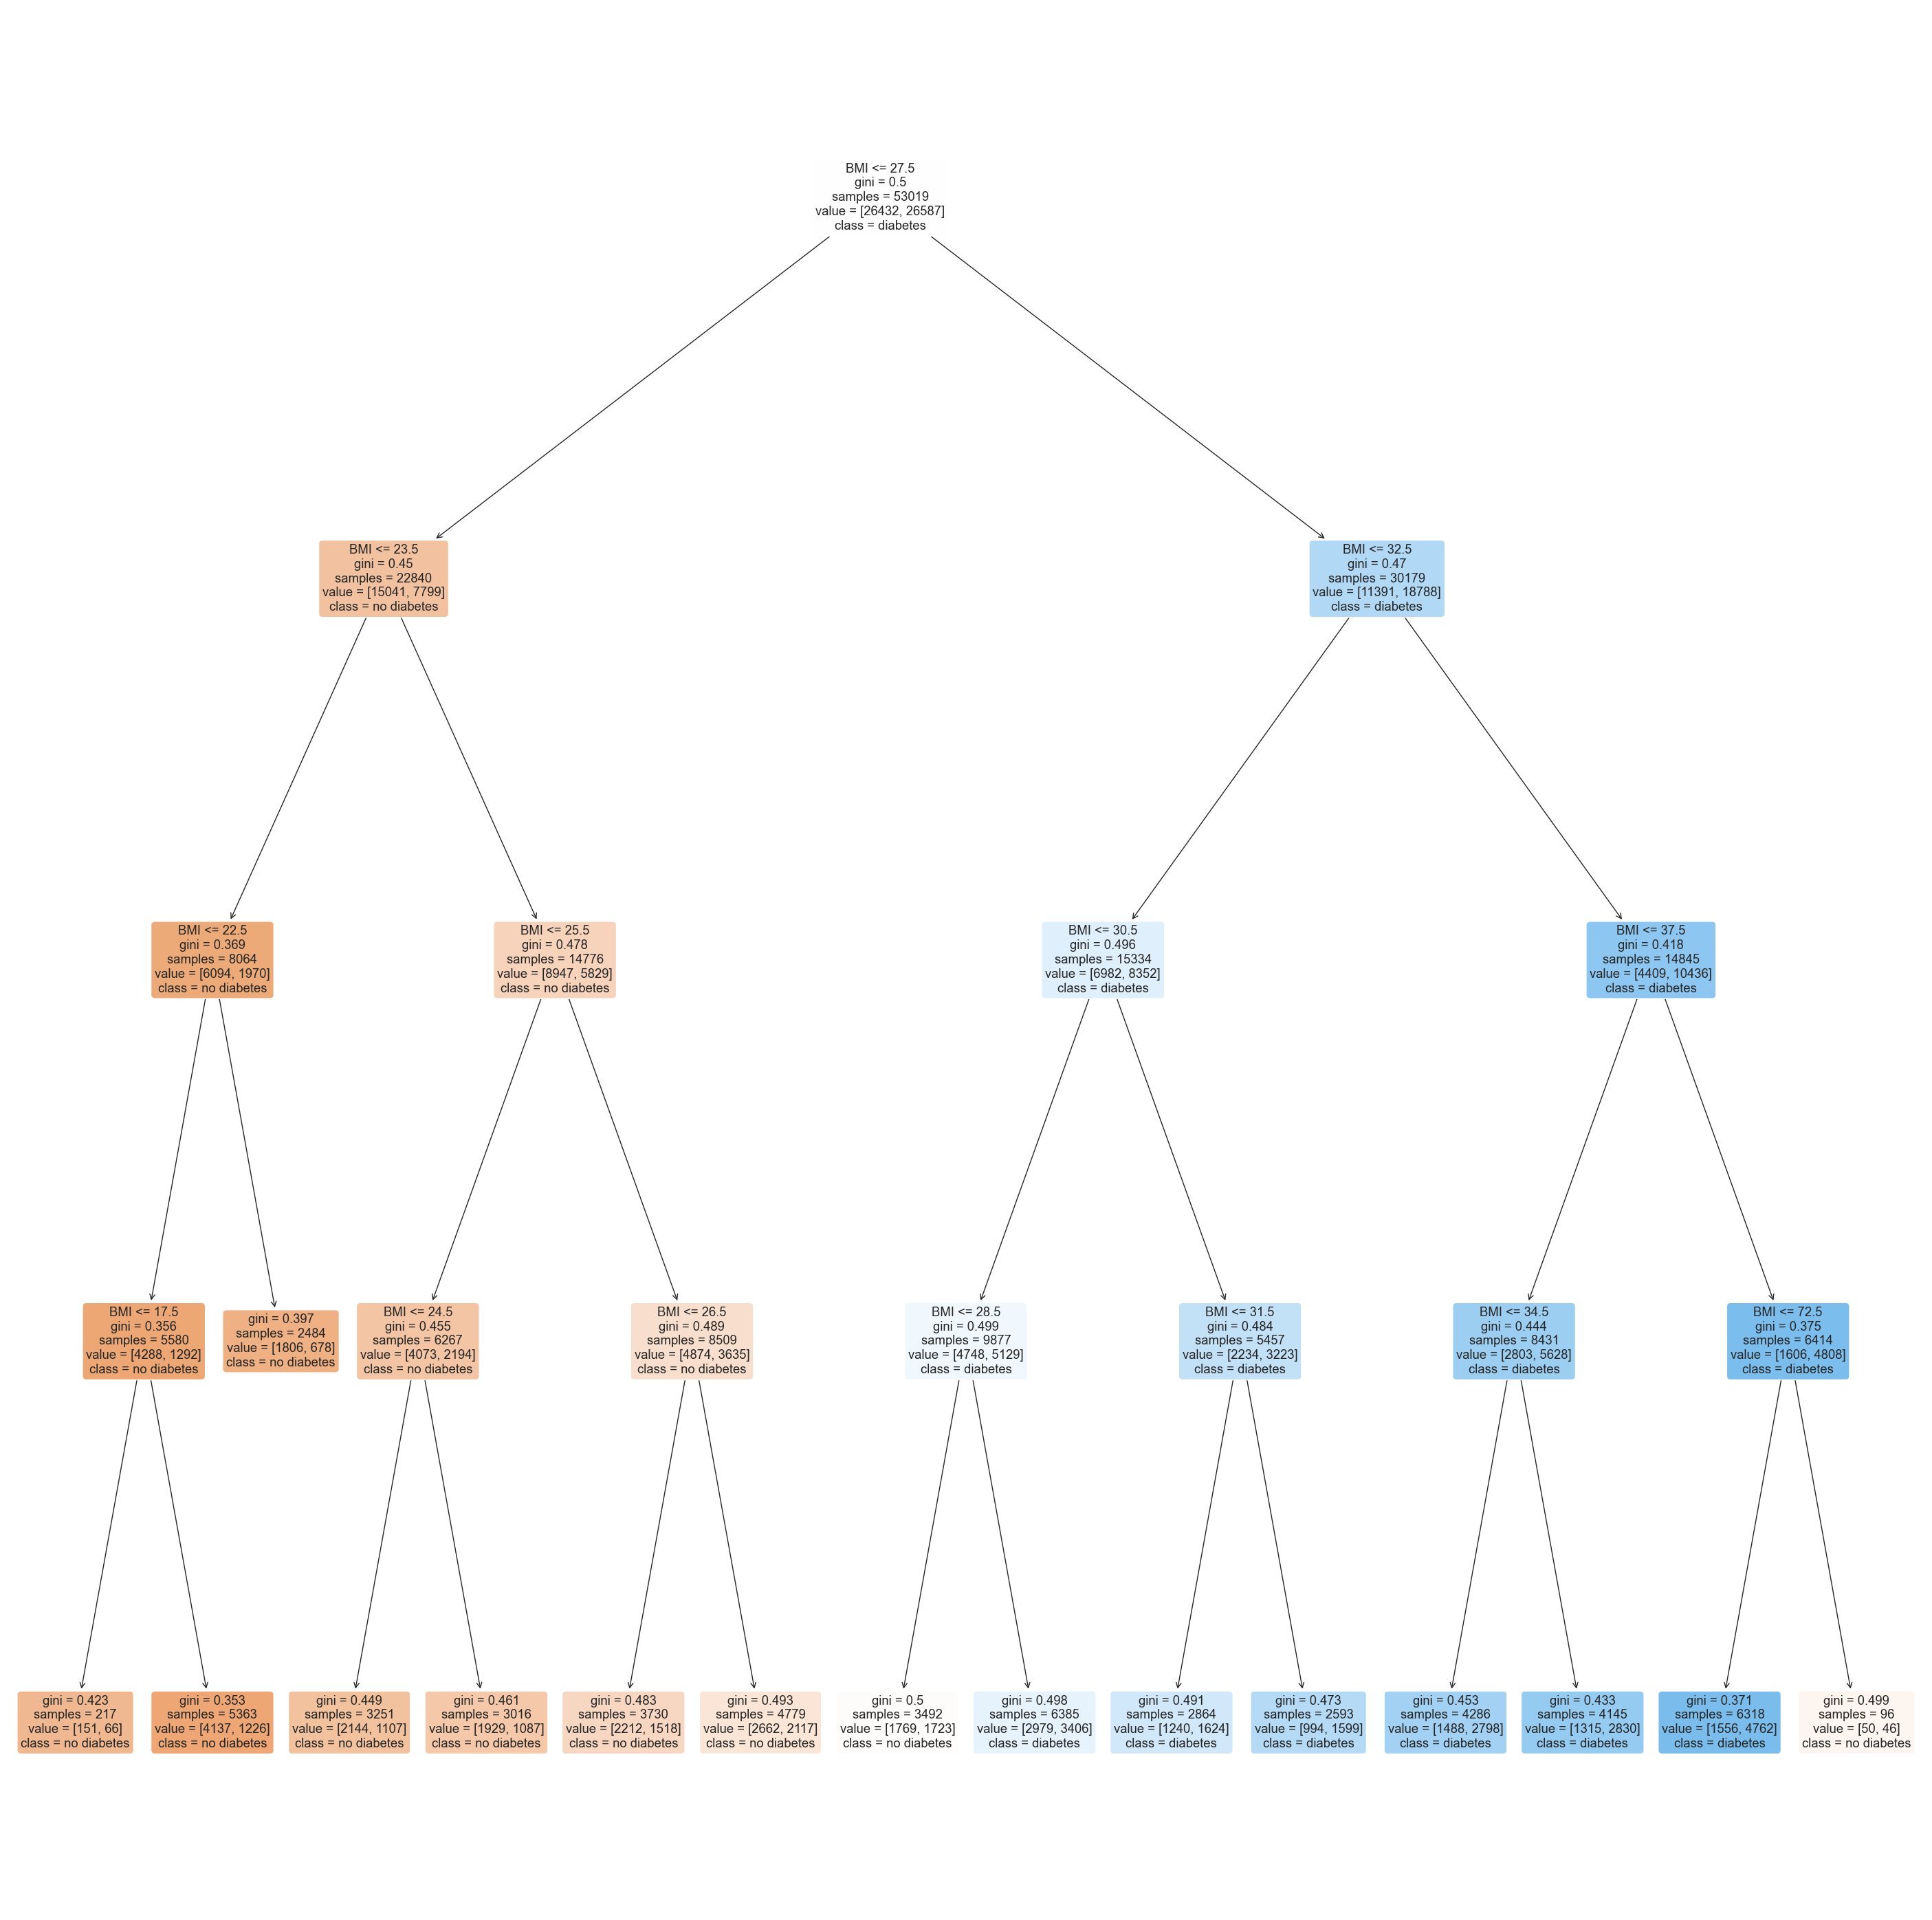

In [61]:
BMI = pd.DataFrame(numeric_data['BMI'])
diabetes_numerical_2 = pd.DataFrame(numeric_data['Diabetes_binary'])

BMI_train, BMI_test, diabetes_numerical_train_2, diabetes_numerical_test_2 = train_test_split(BMI, diabetes_numerical_2, test_size = 0.25)
print("DATA SET: [BMI, diabetes binary]")
print("Train Set :", BMI_train.shape, diabetes_numerical_train_2.shape)
print("Test Set  :", BMI_test.shape, diabetes_numerical_test_2.shape)

BMI_train_DF = pd.concat([BMI_train,diabetes_numerical_train_2], axis = 1).reindex(diabetes_numerical_train_2.index)

# BMI DEC TREE 
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(BMI_train, diabetes_numerical_train_2)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["BMI"], 
          class_names=["no diabetes","diabetes"])

From the leaf nodes of the classification tree, we can see that the **Gini impurity** generally takes a value above **0.400**, with only a few leaf nodes that have a slightly lower value with the lowest value being **0.353**. This suggests _high uncertainty_ in the nodesThis indicates that the classification tree, similar to the one above for `PhysHlth`, struggles to separate the classes and make accurate predictions, possibly due to the skewness of the data.

The **imbalanced** nature of the `PhysHlth` data and the **skewed** nature of the `BMI` data makes analysis using a classification tree _less effective_. Decision trees are extremely sensitive to sampling variability, and is especially so in the presence of **imbalanced and skewed data**. This results in an **inaccurate classification**.

Given the chcaracteristics of the data in `PhyHlth` and `BMI`, we considered that adjustments such as applying _logistic regression_ could be beneficial in handling the data more effectively as logistic regression is robust to outliers.

### Uni Variate Logistic Regression
Response Variable: `Diabetes_binary`<br>
Predictor Variable 1: `PhysHlth`<br>
Predictor Variable 2: `BMI`<br>

Index(['The Logistic Regression is to predict Diabetes_binary based on PhysHlth'], dtype='object')

Train set: (53019, 1) (53019, 1)
Test set: (17673, 1) (17673, 1)

		Train Dataset
True Postive Rate: 		 0.34071948963799026
False Positive Rate: 		 0.16005729794933654

		Test Dataset
True Postive Rate: 		 0.3385657820440429
False Positive Rate: 		 0.15944658652755728



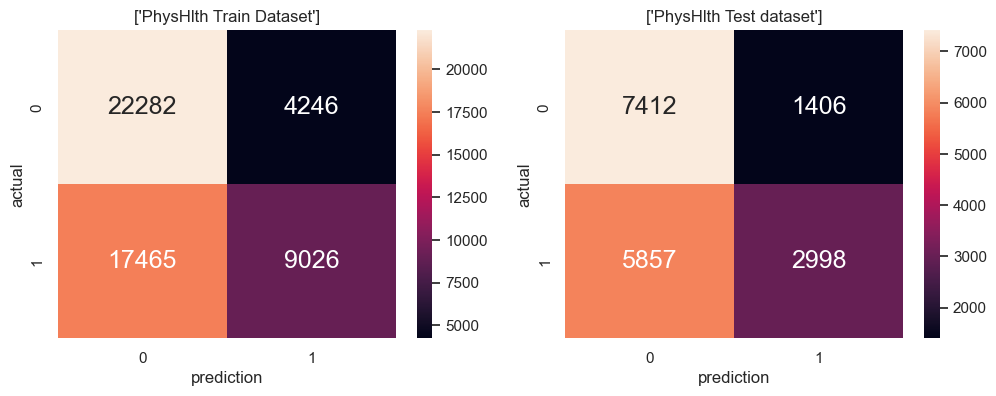

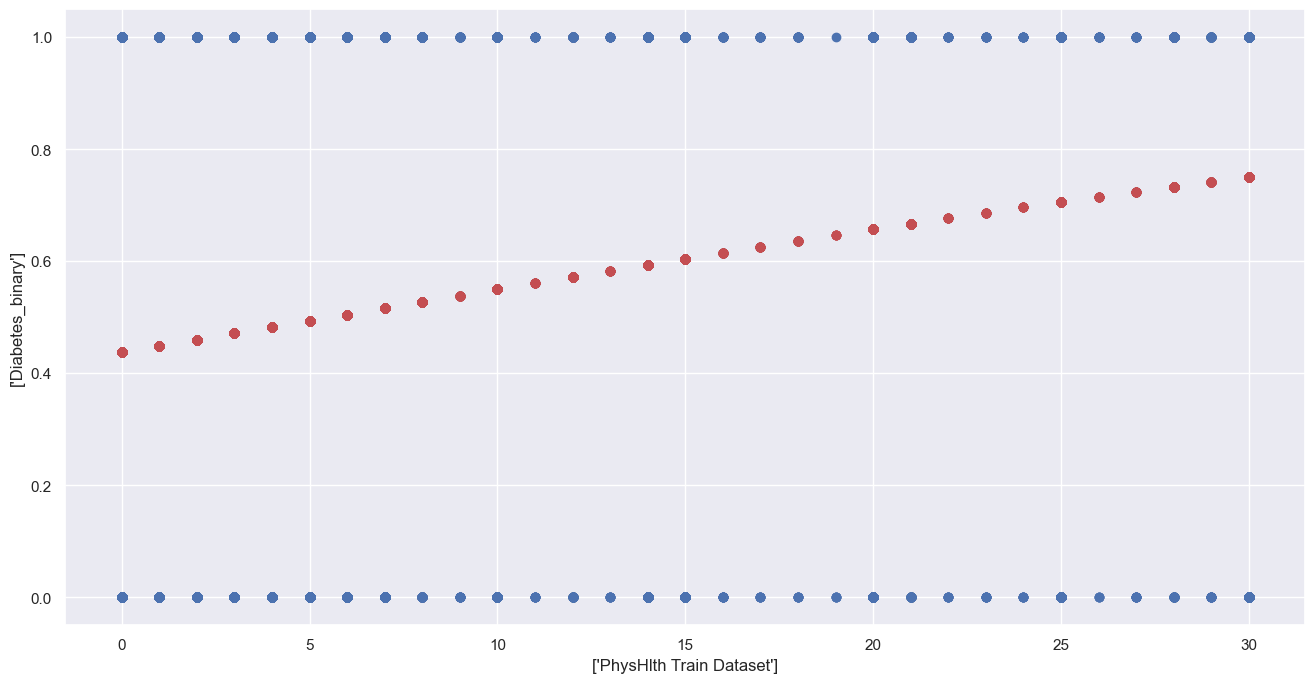

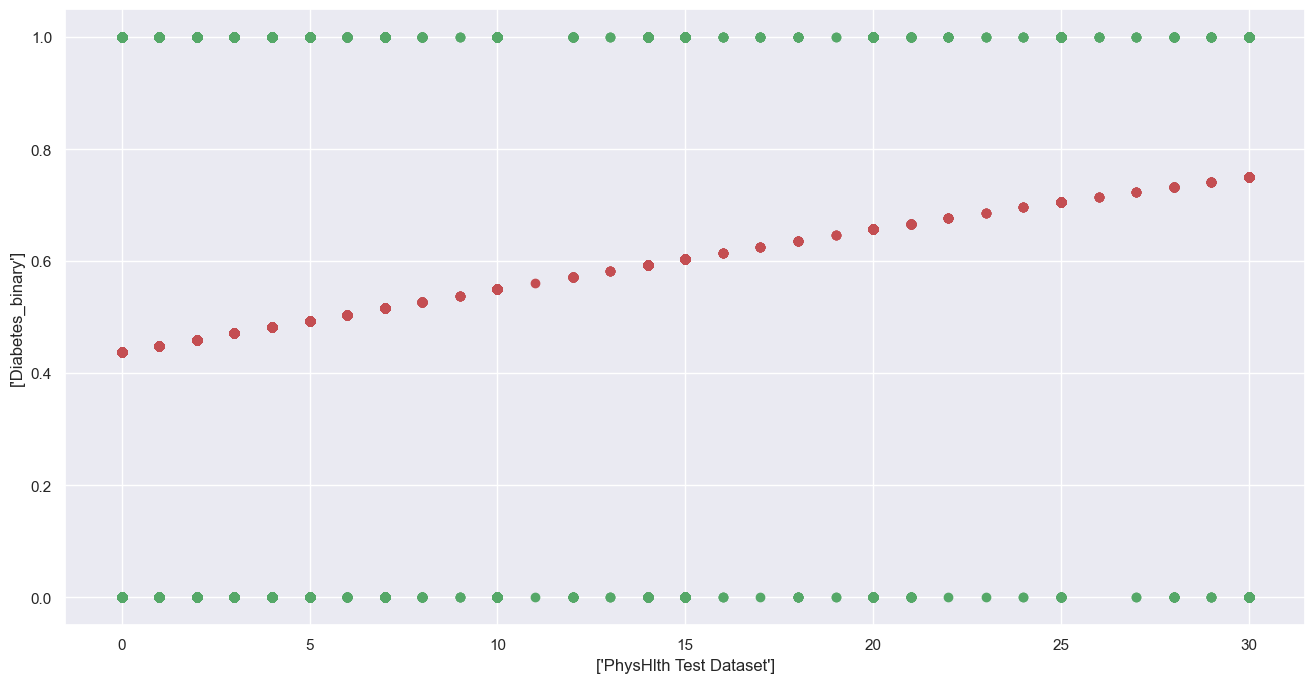

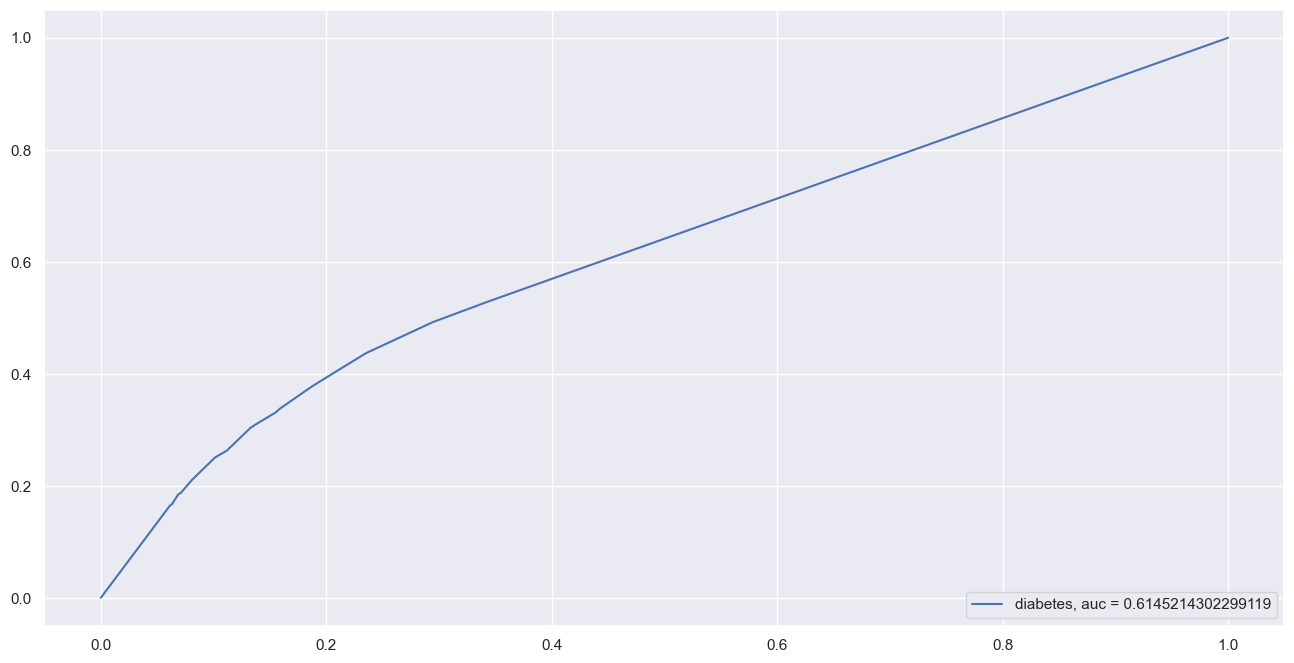

Index(['The Logistic Regression is to predict Diabetes_binary based on BMI'], dtype='object')

Train set: (53019, 1) (53019, 1)
Test set: (17673, 1) (17673, 1)

		Train Dataset
True Postive Rate: 		 0.583270449743435
False Positive Rate: 		 0.3062794644540826

		Test Dataset
True Postive Rate: 		 0.5765663876950916
False Positive Rate: 		 0.31321481145963087



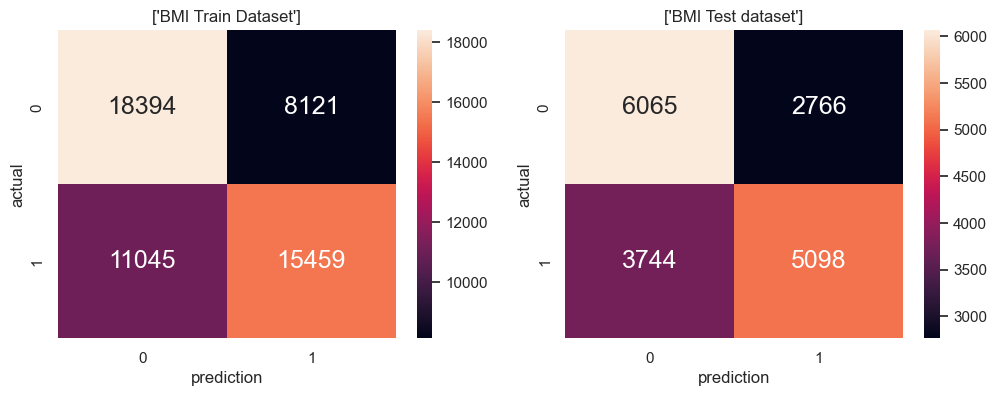

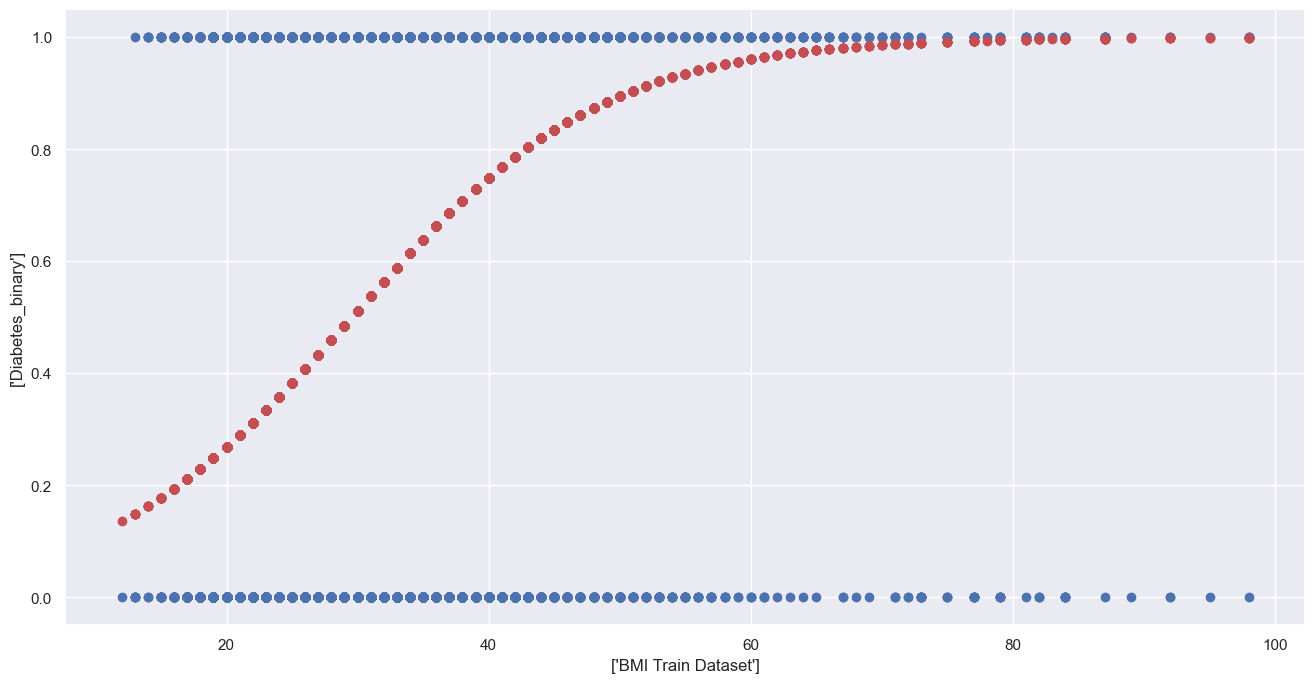

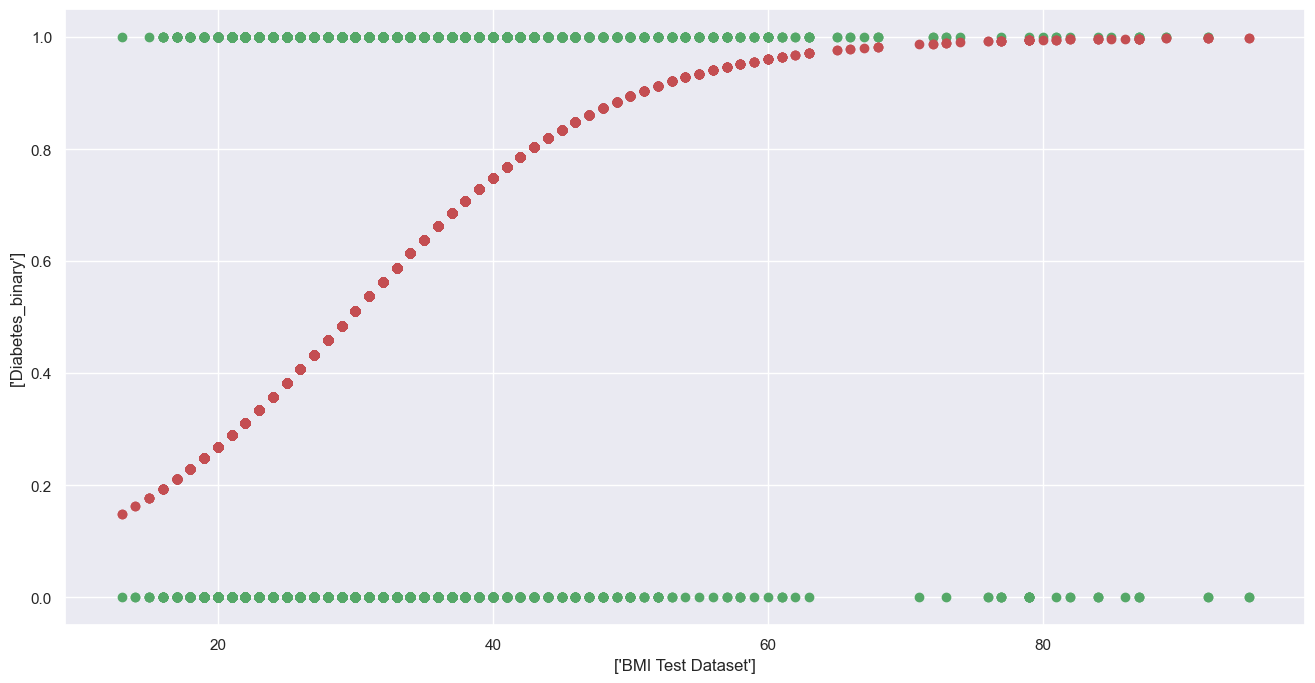

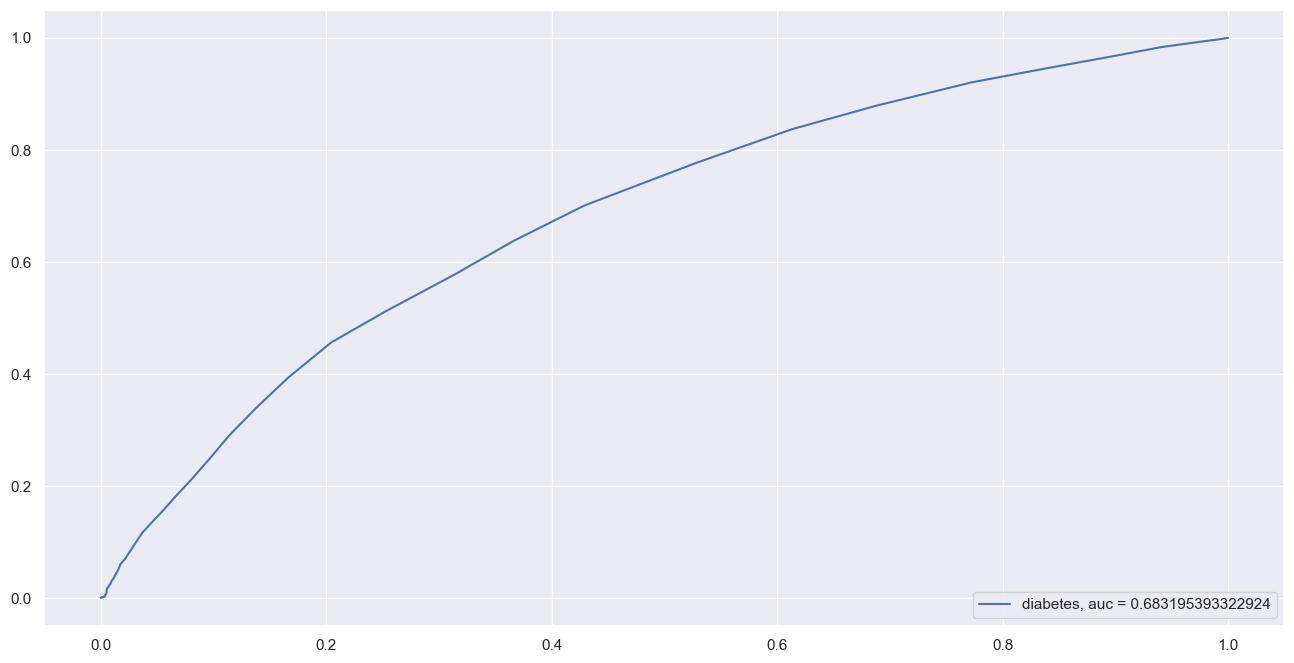

In [80]:
#Performing the Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

def LogRegression(predictor, response):
    print("The Logistic Regression is to predict " + response.columns + " based on " + predictor.columns)
    print()
    
    #Segmenting the train and test data for both the predictor and response
    #Train set is 75% and Test set is 25%
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor, response, test_size = 0.25)
    print("Train set:", predictor_train.shape, response_train.shape)
    print("Test set:", predictor_test.shape, response_test.shape)
    print()
    
    #Instantiating the model
    logreg = LogisticRegression()
    
    #Train the model using the train set
    logreg.fit(predictor_train, np.ravel(response_train.astype(int)))

    #Predict the response value for both the train and test datasets
    response_train_pred = logreg.predict(predictor_train)
    response_test_pred = logreg.predict(predictor_test)
    
    #Calculating FP and TP values
    train_matrix = confusion_matrix(response_train, response_train_pred)
    FP_train = train_matrix[0][1]
    TP_train = train_matrix[1][1]
    FN_train = train_matrix[1][0]
    TN_train = train_matrix[0][0]
    print("\t\tTrain Dataset")
    print("True Postive Rate: \t\t", TP_train/(FN_train + TP_train))
    print("False Positive Rate: \t\t", FP_train/(FP_train + TN_train))
    print()
    test_matrix = confusion_matrix(response_test,response_test_pred)
    FP_test = test_matrix[0][1]
    TP_test = test_matrix[1][1]
    FN_test = test_matrix[1][0]
    TN_test = test_matrix[0][0]
    print("\t\tTest Dataset")
    print("True Postive Rate: \t\t", TP_test/(FN_test + TP_test))
    print("False Positive Rate: \t\t", FP_test/(FP_test + TN_test))
    print()
    f, axes = plt.subplots(1, 2, figsize = (12,4))
    sb.heatmap(train_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[0])
    axes[0].set_title(predictor_test.columns.values + ' Train Dataset')
    axes[0].set_xlabel('prediction')
    axes[0].set_ylabel('actual')
    sb.heatmap(test_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[1])
    axes[1].set_title(predictor_test.columns.values + ' Test dataset')
    axes[1].set_xlabel('prediction')
    axes[1].set_ylabel('actual')

    
    #Plot the Regression Line for both train and test dataset
    f = plt.figure(figsize = (16,8))
    plt.scatter(predictor_train,response_train)
    plt.scatter(predictor_train,logreg.predict_proba(predictor_train)[:,1],color = 'r')
    plt.xlabel(predictor_train.columns.values + " Train Dataset")
    plt.ylabel(response_train.columns.values)

    f = plt.figure(figsize = (16,8))
    plt.scatter(predictor_test, response_test, color = 'g')
    plt.scatter(predictor_test, logreg.predict_proba(predictor_test)[:,1],color = 'r')
    plt.xlabel(predictor_test.columns.values + " Test Dataset")
    plt.ylabel(response_test.columns.values)

    #PLot the roc curve 
    f = plt.figure(figsize = (16,8))
    response_test_pred_proba = logreg.predict_proba(predictor_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(response_test, response_test_pred_proba)
    auc = metrics.roc_auc_score(response_test, response_test_pred_proba)

    plt.plot(fpr,tpr,label = "diabetes, auc = " + str(auc))
    plt.legend(loc=4)
    
    plt.show()

LogRegression(PhysHlth,diabetes_numerical)
LogRegression(BMI,diabetes_numerical_2)

Comparing `PhysHlth` and `BMI`:

Within the **Train** dataset, 
1. `PhysHlth` and `BMI` have True-Positive rates of **34.07%** and **58.33%** 
2. `PhysHlth` and `BMI` have False-Positive rates **16.01%** and **30.63%**

Within the **Test** dataset,
1. `PhysHlth` and `BMI` have True-Positive rates of **33.86%** and **57.66%** 
2. `PhysHlth` and `BMI` have False-Positive rates **15.94%** and **31.32%**

The **low** True-Positive rates for `PhysHlth` in both the Train and Test dataset indicates that the _Logistic Regression Model_ that we have adopted is unable to handle the **highly skewed** `PhysHlth` dataset and can only manage a small amount of skewness as shown in `BMI`.

The ROC Curve plots the True Positive Rate against the False Positive Rate. The AUC which refers to the area under the ROC Curve measures how well the predictions are. The AUC values of `PhysHlth` and `BMI` are **0.61** and **0.68** which indicates that the classifier performed poorly.

Overall, _Logistic Regression_ was not the ideal method to analyse the **highly skewed** dataset.


### Multi-Layer Perceptron (MLP)

MLP is a feedforward Artificial Neural Network that consists of an input layer, mulitple hidden layers and an output layer of neurons where each neurons in each layer is connected to that in the next layer. Each connection has an assigned weight which defines the strength of the relationship. During the training process, the network learns to **adjust the weight and biases**. Furthermore, by using _backpropagation_, the loss function which determines the accuracy of the model is minimised to achieve the best results.

Response Variable: `Diabetes_binary`<br>
Predictor Variable 1: `PhysHlth`<br>
Predictor Variable 2: `BMI`<br>

This is why we decided to use _Multi-Layer Perceptron (MLP)_ to analyse our **skewed data**. The flexibility of MLP allows it to adapt to different types of data distribution. By learning from the data, MLP is able to learn complex patterns in the data to effectively **model underlying patterns**, even in the presence of skewed data. 

Index(['The Multi Layer Perceptron is to predict Diabetes_binary based on PhysHlth'], dtype='object')

Train set: (53019, 1) (53019, 1)
Test set: (17673, 1) (17673, 1)

Index(['Classification Report for PhysHlth Train Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.58      0.76      0.66     26599
have diabetes       0.65      0.44      0.52     26420

     accuracy                           0.60     53019
    macro avg       0.61      0.60      0.59     53019
 weighted avg       0.61      0.60      0.59     53019


Index(['Classification Report for PhysHlth Test Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.57      0.76      0.65      8747
have diabetes       0.65      0.43      0.52      8926

     accuracy                           0.59     17673
    macro avg       0.61      0.60      0.58     17673
 weighted avg       0.61      0.59      0.58     17673

		Train Datas

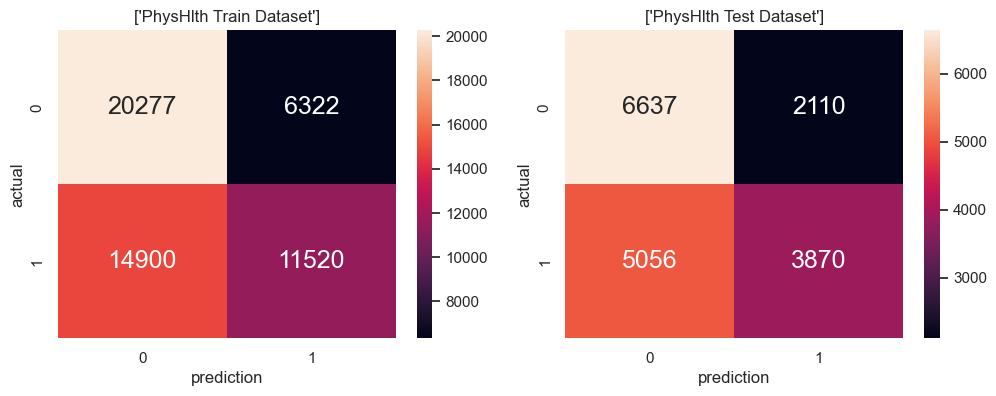

Index(['The Multi Layer Perceptron is to predict Diabetes_binary based on BMI'], dtype='object')

Train set: (53019, 1) (53019, 1)
Test set: (17673, 1) (17673, 1)

Index(['Classification Report for BMI Train Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.64      0.64      0.64     26599
have diabetes       0.64      0.64      0.64     26420

     accuracy                           0.64     53019
    macro avg       0.64      0.64      0.64     53019
 weighted avg       0.64      0.64      0.64     53019


Index(['Classification Report for BMI Test Dataset'], dtype='object')
               precision    recall  f1-score   support

  no diabetes       0.64      0.63      0.63      8747
have diabetes       0.64      0.65      0.64      8926

     accuracy                           0.64     17673
    macro avg       0.64      0.64      0.64     17673
 weighted avg       0.64      0.64      0.64     17673

		Train Dataset
True Postive

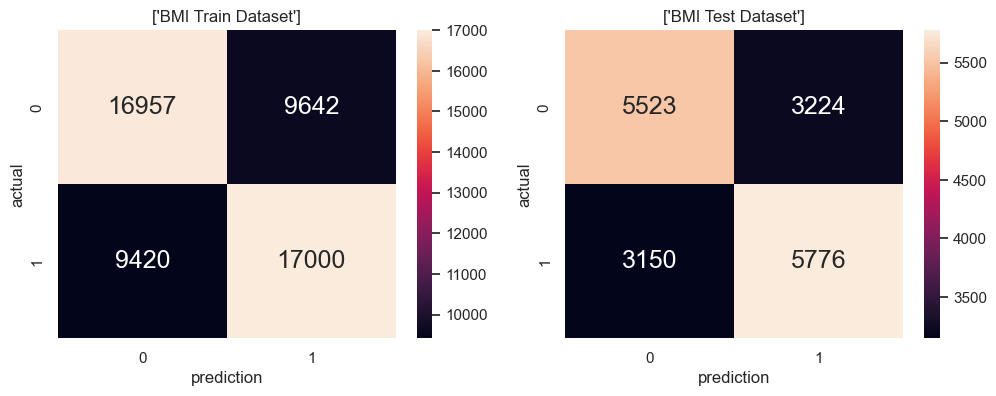

In [59]:
from sklearn.neural_network import MLPClassifier

def MultiLayerPerceptron(predictor,response):
    print("The Multi Layer Perceptron is to predict " + response.columns + " based on " + predictor.columns)
    print()
    
    #Segmenting the train and test data for both the predictor and response
    #Train set is 75% and Test set is 25%
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor, response, test_size = 0.25)
    print("Train set:", predictor_train.shape, response_train.shape)
    print("Test set:", predictor_test.shape, response_test.shape)
    print()
    
    #Create the MLP Object
    clf = MLPClassifier(hidden_layer_sizes = (350,100,100,100,100,100), random_state=1, max_iter=1000)
    
    #Train the model using the train set
    clf.fit(predictor_train, np.ravel(response_train.astype(int)))
    
    #Predict the response value for both the train and test datasets
    response_train_pred = clf.predict(predictor_train)
    response_test_pred = clf.predict(predictor_test)
    
    #Print the classification report
    target_names = ['no diabetes', 'have diabetes']
    print("Classification Report for " + predictor.columns + " Train Dataset")
    print(classification_report(response_train,response_train_pred, target_names = target_names))
    print()
    print("Classification Report for " + predictor.columns + " Test Dataset")
    print(classification_report(response_test,response_test_pred, target_names = target_names))
    
    #Calculating the FP and TP values
    train_matrix = confusion_matrix(response_train, response_train_pred)
    FP_train = train_matrix[0][1]
    TP_train = train_matrix[1][1]
    FN_train = train_matrix[1][0]
    TN_train = train_matrix[0][0]
    print("\t\tTrain Dataset")
    print("True Postive Rate: \t\t", TP_train/(FN_train + TP_train))
    print("False Positive Rate: \t\t", FP_train/(FP_train + TN_train))
    print()
    
    test_matrix = confusion_matrix(response_test, response_test_pred)
    FP_test = test_matrix[0][1]
    TP_test = test_matrix[1][1]
    FN_test = test_matrix[1][0]
    TN_test = test_matrix[0][0]
    print("\t\tTest Dataset")
    print("True Postive Rate: \t\t", TP_test/(FN_test + TP_test))
    print("False Positive Rate: \t\t", FP_test/(FP_test + TN_test))
    print()

    #Plot the Confusion Matrix for Train and Test
    test_matrix = confusion_matrix(response_test, response_test_pred)
    f, axes = plt.subplots(1, 2, figsize = (12,4))
    sb.heatmap(train_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[0])
    axes[0].set_title(predictor_test.columns.values + ' Train Dataset')
    axes[0].set_xlabel('prediction')
    axes[0].set_ylabel('actual')

    sb.heatmap(test_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[1])
    axes[1].set_title(predictor_test.columns.values + ' Test Dataset')
    axes[1].set_xlabel('prediction')
    axes[1].set_ylabel('actual')
    
    
    plt.show()

MultiLayerPerceptron(PhysHlth,diabetes_numerical)
MultiLayerPerceptron(BMI,diabetes_numerical_2)

Comparing between the _Logistic Regression Model_ and the _Multi Layer Perceptron_, `PhysHlth` and `BMI` both have a higher True-positive rate of **43.36%** and **64.71%** in the test dataset which indicates that the _MLP Model_ is more effective and useful to evaluate the dataset compared to the _Logistic Regression Model_

In the Classification Report:

1. **Accuracy** measures the proportion of **correct predictions out of the total number of predictions**
2. **Precision** measures the proportion of **true positive predictions among all positive predictions**. It focuses on the **accuracy of positive predictions**.
3. **Recall** measures the proportion of **true positive predictions among all actual positive instances**. It focuses on the ability of the classifier to **correctly identify positive instances**.
4. **F1 score** is the **harmonic mean of precision and recall**. It focuses on **balancing precision and recall**.
    - The F1 score for the Class of **have diabetes** indicates the model's abiility to correctly identify **patients with diabetes** and **minimises the misclassification of non-diabetic patients as diabetic**
    - The F1 score for the Class of **no diabetes** indicates the model's ability to correctly identify **non-diabetic patients** and **minimises the misclassification of diabetic patients as non-diabetic**

Comparing `PhysHlth` and `BMI`:

Within the **Train** dataset, 
1. `PhysHlth` and `BMI` have accuracies of **60%** and **64%** 
2. `PhysHlth` and `BMI` have **66%** and **64%** for F1 scores for _no diabetes_
3. `PhysHlth` and `BMI` have **52%** and **64%** for F1 scores for _have diabetes_

Within the **Test** dataset,
1. `PhysHlth` and `BMI` have accuracies of **59%** and **64%** 
2. `PhysHlth` and `BMI` have **65%** and **63%** for F1 scores for _no diabetes_
3. `PhysHlth` and `BMI` have **52%** and **64%** for F1 scores for _have diabetes_

Overall, `BMI` has **greater** accuracy and F1 score for people with diabetes than `PhysHlth` which implies that `BMI` is the more accurate numerical predictor and is able to correctly identify the **diabetic** patients while making the least misclassifications of **non-diabetic** as **diabetic**.

---------------------------------------------------------------------------------------------------------------------------------
## One Hot Encoded Data
### One Hot Encoded Variables: Age, GenHlth & Income

### Exploratory Data Analysis 
1. Statistical Exploration for `Age`
2. Statistical Exploration for `GenHlth`
3. Statistical Exploration for `Income`

In [98]:
crosstabAge = pd.crosstab(oneHot_data['Age'], oneHot_data['Diabetes_binary'])
ageColumnSum = crosstabAge.sum(axis=1)
print("Number of observations in each level of the 'Age' column:")
print(ageColumnSum)
print()

crosstabGenHlth = pd.crosstab(oneHot_data['GenHlth'], oneHot_data['Diabetes_binary'])
genHlthColumnSum = crosstabGenHlth.sum(axis=1)
print("Number of observations in each level of the 'GenHlth' column:")
print(genHlthColumnSum)
print()

crosstabIncome = pd.crosstab(oneHot_data['Income'], oneHot_data['Diabetes_binary'])
incomeColumnSum = crosstabIncome.sum(axis=1)
print("Number of observations in each level of the 'Income' column:")
print(incomeColumnSum)
print()

Number of observations in each level of the 'Age' column:
Age
1.0       979
2.0      1396
3.0      2049
4.0      2793
5.0      3520
6.0      4648
7.0      6872
8.0      8603
9.0     10112
10.0    10856
11.0     8044
12.0     5394
13.0     5426
dtype: int64

Number of observations in each level of the 'GenHlth' column:
GenHlth
1.0     8282
2.0    19872
3.0    23427
4.0    13303
5.0     5808
dtype: int64

Number of observations in each level of the 'Income' column:
Income
1.0     3611
2.0     4498
3.0     5557
4.0     6658
5.0     8010
6.0    10287
7.0    11425
8.0    20646
dtype: int64



From this, it is evident that the distribution of observations across the various levels of these three variables is **notably uneven**. Hence, to standardise the representation of diabetes occurrence across the levels, we will be calculating the percentage of individuals with diabetes within each age category. By expressing the proportion of individuals with diabetes as a percentage for each category, we ensure a consistent and standardized metric for assessing the association between the predictor variables and `Diabetes_binary`.

### One Hot Encoded Variable 1: Age [Exploratory Data Analysis]

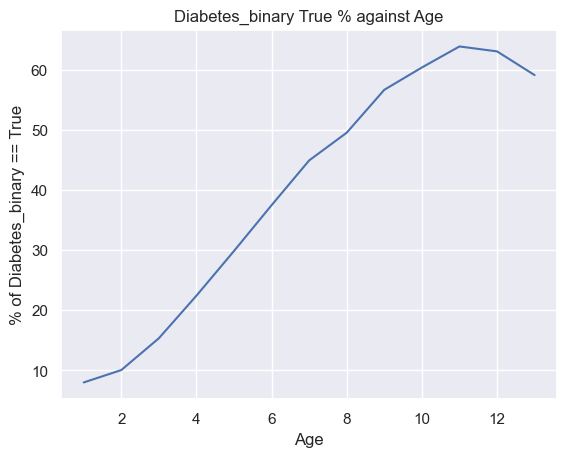

In [90]:
age_diabetes = oneHot_data[['Age', 'Diabetes_binary']].copy()
age_diabetes['Diabetes_binary'] = age_diabetes['Diabetes_binary'].replace({1.0: "True", 0.0: "False"})

# Calculate the percentage of 'Diabetes_binary' being True for each income level
age_diabetes['Diabetes_True'] = (age_diabetes['Diabetes_binary'] == "True")
age_diabetes_true_percentage = age_diabetes.groupby('Age')['Diabetes_True'].mean() * 100

# Plotting
age_diabetes_true_percentage.plot()

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('% of Diabetes_binary == True')
plt.title('Diabetes_binary True % against Age')

# Displaying the plot
plt.show()


The graph shows a **positive correlation** between between `Age` and `Diabetes_binary`, with a generally increasing trend. This means that the older a person is, the more likely they are to have diabetes. There is a **slight dip** in the graph from the Age categories 11 to 13 (> 70 years old), suggesting a _slight deviation_ from the previously established positive correlation. The category with the highest percentage of respondents with diabetes is category 11 (ages 70-74).


### One Hot Encoded Variable 2: GenHlth [Exploratory Data Analysis]

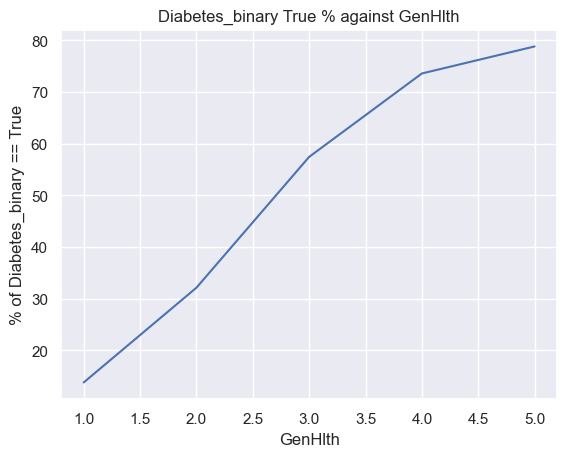

In [93]:
gh_diabetes = oneHot_data[['GenHlth', 'Diabetes_binary']].copy()
gh_diabetes['Diabetes_binary'] = gh_diabetes['Diabetes_binary'].replace({1.0: "True", 0.0: "False"})

# Calculate the percentage of 'Diabetes_binary' being True for each income level
gh_diabetes['Diabetes_True'] = (gh_diabetes['Diabetes_binary'] == "True")
gh_diabetes_true_percentage = gh_diabetes.groupby('GenHlth')['Diabetes_True'].mean() * 100

# Plotting
gh_diabetes_true_percentage.plot()

# Adding labels and title
plt.xlabel('GenHlth')
plt.ylabel('% of Diabetes_binary == True')
plt.title('Diabetes_binary True % against GenHlth')

# Displaying the plot
plt.show()

The graph shows a **positive correlation** between the variables `GenHlth` and `Diabetes_binary`, demonstrated by a generally increasing trend. Category 1 indicates excellent general health and 5 indicates poor general health. This implies that the lower the quality of a person's general health, the more likely they are to have diabetes.

### One Hot Encoded Variable 3: Income [Exploratory Data Analysis]

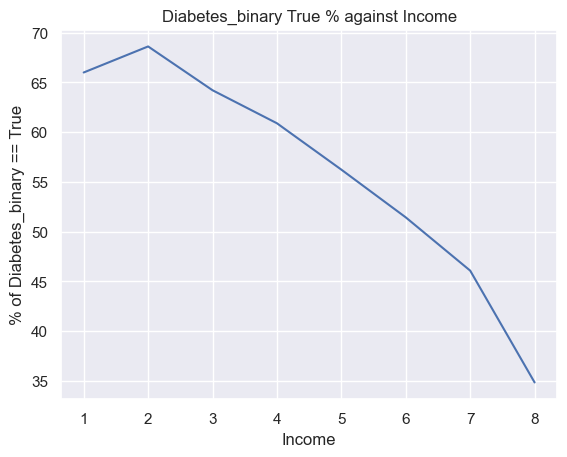

In [94]:
income_diabetes = oneHot_data[['Income', 'Diabetes_binary']].copy()
income_diabetes['Diabetes_binary'] = income_diabetes['Diabetes_binary'].replace({1.0: "True", 0.0: "False"})

# Calculate the percentage of 'Diabetes_binary' being True for each income level
income_diabetes['Diabetes_True'] = (income_diabetes['Diabetes_binary'] == "True")
income_diabetes_true_percentage = income_diabetes.groupby('Income')['Diabetes_True'].mean() * 100

# Plotting
income_diabetes_true_percentage.plot()

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('% of Diabetes_binary == True')
plt.title('Diabetes_binary True % against Income')

# Displaying the plot
plt.show()

The graph shows a **negative correlation** between between `Income` and `Diabetes_binary`, with a generally decreasing trend. The higher the person's income, the less likely they are to have diabetes. There is a **slight increase** in the graph from categories 1 to 2, which is be a _slight deviation_ from the negative correlation. **Category 2** also has the **highest percentage of respondents with diabetes**.

### Random Forest Classifier (RF)

MLP is a feedforward Artificial Neural Network that consists of an input layer, mulitple hidden layers and an output layer of neurons where each neurons in each layer is connected to that in the next layer. Each connection has an assigned weight which defines the strength of the relationship. During the training process, the network learns to **adjust the weight and biases**. Furthermore, by using _backpropagation_, the loss function which determines the accuracy of the model is minimised to achieve the best results.

Response Variable: `Diabetes_binary`<br>
Predictor Variable 1: `Age`<br>
Predictor Variable 2: `GenHlth`<br>
Predictor Variable 3: `Income` <br>

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [70]:
from sklearn.metrics import confusion_matrix
def cfm(response_train, response_train_pred, response_test, response_test_pred):
    #Calculating the FP and TP values
    train_matrix = confusion_matrix(response_train, response_train_pred)
    FP_train = train_matrix[0][1]
    TP_train = train_matrix[1][1]
    FN_train = train_matrix[1][0]
    TN_train = train_matrix[0][0]
    print("\t\tTrain Dataset")
    print("True Postive Rate: \t\t", TP_train/(FN_train + TP_train))
    print("False Positive Rate: \t\t", FP_train/(FP_train + TN_train))
    print()
    
    test_matrix = confusion_matrix(response_test, response_test_pred)
    FP_test = test_matrix[0][1]
    TP_test = test_matrix[1][1]
    FN_test = test_matrix[1][0]
    TN_test = test_matrix[0][0]
    print("\t\tTest Dataset")
    print("True Postive Rate: \t\t", TP_test/(FN_test + TP_test))
    print("False Positive Rate: \t\t", FP_test/(FP_test + TN_test))
    print()

    #Plot the Confusion Matrix for Train and Test
    test_matrix = confusion_matrix(response_test, response_test_pred)
    f, axes = plt.subplots(1, 2, figsize = (12,4))
    sb.heatmap(train_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[0])
    axes[0].set_xlabel('prediction')
    axes[0].set_ylabel('actual')

    sb.heatmap(test_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[1])
    axes[1].set_xlabel('prediction')
    axes[1].set_ylabel('actual')
    
    
    plt.show()

### One Hot Encoded Variable 1: Age [Random Forest Model]

In [74]:
ages = pd.DataFrame(oneHot_data['Age'])
diabetes = pd.DataFrame(oneHot_data['Diabetes_binary'])

Age_train, Age_test, diabetes_age_train, diabetes_age_test = train_test_split(ages, diabetes, test_size = 0.25)
print("DATA SET: [Age, diabetes binary]")
print("Train Set :", Age_train.shape, diabetes_age_train.shape)
print("Test Set  :", Age_test.shape, diabetes_age_test.shape)

Age_train_DF = pd.concat([Age_train,diabetes_age_train], axis = 1).reindex(diabetes_age_train.index)

DATA SET: [Age, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


In [75]:
# Train the model
rf_model.fit(Age_train, np.ravel(diabetes_age_train.astype(int)))

RandomForestClassifier(random_state=42)

Train Set:
Accuracy: 0.616439389652766
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59     26496
         1.0       0.60      0.68      0.64     26523

    accuracy                           0.62     53019
   macro avg       0.62      0.62      0.61     53019
weighted avg       0.62      0.62      0.61     53019

Test Set:
Accuracy: 0.6178351157132349
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59      8850
         1.0       0.60      0.68      0.64      8823

    accuracy                           0.62     17673
   macro avg       0.62      0.62      0.62     17673
weighted avg       0.62      0.62      0.62     17673

		Train Dataset
True Postive Rate: 		 0.679975869999623
False Positive Rate: 		 0.44716183574879226

		Test Dataset
True Postive Rate: 		 0.6810608636518191
False Positive Rate: 		 0.44519774011299434



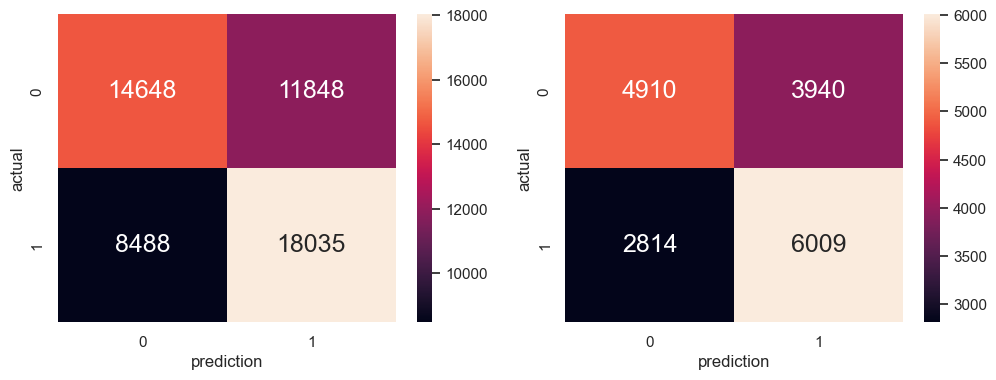

In [76]:
diabetes_age_train_pred = rf_model.predict(Age_train)
print("Train Set:")
# Calculate accuracy
accuracy = accuracy_score(diabetes_age_train, diabetes_age_train_pred)
print("Accuracy:", accuracy)
# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_age_train, diabetes_age_train_pred))

diabetes_age_test_pred = rf_model.predict(Age_test)
print("Test Set:")
# Calculate accuracy
accuracy = accuracy_score(diabetes_age_test, diabetes_age_test_pred)
print("Accuracy:", accuracy)
# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_age_test, diabetes_age_test_pred))

cfm(diabetes_age_train, diabetes_age_train_pred, diabetes_age_test, diabetes_age_test_pred)

### One Hot Encoded Variable 2: GenHlth [Random Forest Model]

In [66]:
genHlth = pd.DataFrame(oneHot_data['GenHlth'])

genHlth_train, genHlth_test, diabetes_GH_train, diabetes_GH_test = train_test_split(genHlth, diabetes, test_size = 0.25)
print("DATA SET: [GenHlth, diabetes binary]")
print("Train Set :", genHlth_train.shape, diabetes_GH_train.shape)
print("Test Set  :", genHlth_test.shape, diabetes_GH_test.shape)

genHlth_train_DF = pd.concat([genHlth_train,diabetes_GH_train], axis = 1).reindex(diabetes_GH_train.index)


DATA SET: [GenHlth, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


In [67]:
# Train the model
rf_model.fit(genHlth_train, np.ravel(diabetes_GH_train.astype(int)))


RandomForestClassifier(random_state=42)

Train Set:
Accuracy: 0.6845093268450932
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.65     26588
         1.0       0.65      0.79      0.71     26431

    accuracy                           0.68     53019
   macro avg       0.69      0.68      0.68     53019
weighted avg       0.69      0.68      0.68     53019

Test Set:
Accuracy: 0.688394726418831
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.65      8758
         1.0       0.66      0.79      0.72      8915

    accuracy                           0.69     17673
   macro avg       0.70      0.69      0.68     17673
weighted avg       0.70      0.69      0.68     17673

		Train Dataset
True Postive Rate: 		 0.7860466876016798
False Positive Rate: 		 0.4164284639687077

		Test Dataset
True Postive Rate: 		 0.7906898485698262
False Positive Rate: 		 0.41573418588718886



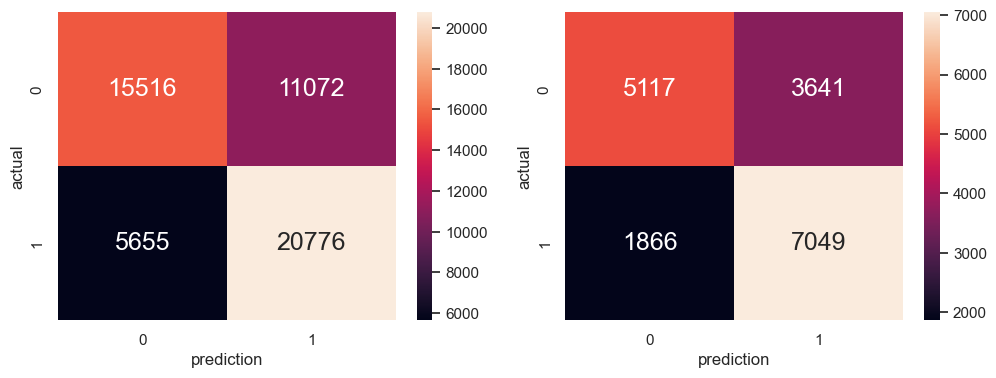

In [71]:
diabetes_GH_train_pred = rf_model.predict(genHlth_train)
print("Train Set:")
# Calculate accuracy
accuracy_train = accuracy_score(diabetes_GH_train, diabetes_GH_train_pred)
print("Accuracy:", accuracy_train)
# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_GH_train, diabetes_GH_train_pred))



diabetes_GH_test_pred = rf_model.predict(genHlth_test)
print("Test Set:")
# Calculate accuracy
accuracy = accuracy_score(diabetes_GH_test, diabetes_GH_test_pred)
print("Accuracy:", accuracy)
# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_GH_test, diabetes_GH_test_pred))

cfm(diabetes_GH_train, diabetes_GH_train_pred, diabetes_GH_test, diabetes_GH_test_pred)

### One Hot Encoded Variable 3: Income [Random Forest Model]

In [77]:
income = pd.DataFrame(oneHot_data['Income'])

income_train, income_test, diabetes_income_train, diabetes_income_test = train_test_split(income, diabetes, test_size = 0.25)
print("DATA SET: [Income, diabetes binary]")
print("Train Set :", income_train.shape, diabetes_income_train.shape)
print("Test Set  :", income_test.shape, diabetes_income_test.shape)

income_train_DF = pd.concat([income_train,diabetes_income_train], axis = 1).reindex(diabetes_income_train.index)


DATA SET: [Income, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


In [78]:
# Train the model
rf_model.fit(income_train, np.ravel(diabetes_income_train.astype(int)))


RandomForestClassifier(random_state=42)

Train Set:
Accuracy: 0.6002376506535393
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.55      0.58     26440
         1.0       0.59      0.65      0.62     26579

    accuracy                           0.60     53019
   macro avg       0.60      0.60      0.60     53019
weighted avg       0.60      0.60      0.60     53019

Test Set:
Accuracy: 0.6039155774345046
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59      8906
         1.0       0.59      0.65      0.62      8767

    accuracy                           0.60     17673
   macro avg       0.61      0.60      0.60     17673
weighted avg       0.61      0.60      0.60     17673

		Train Dataset
True Postive Rate: 		 0.6468640656157116
False Positive Rate: 		 0.4466338880484115

		Test Dataset
True Postive Rate: 		 0.6493669442226532
False Positive Rate: 		 0.44082640916236243



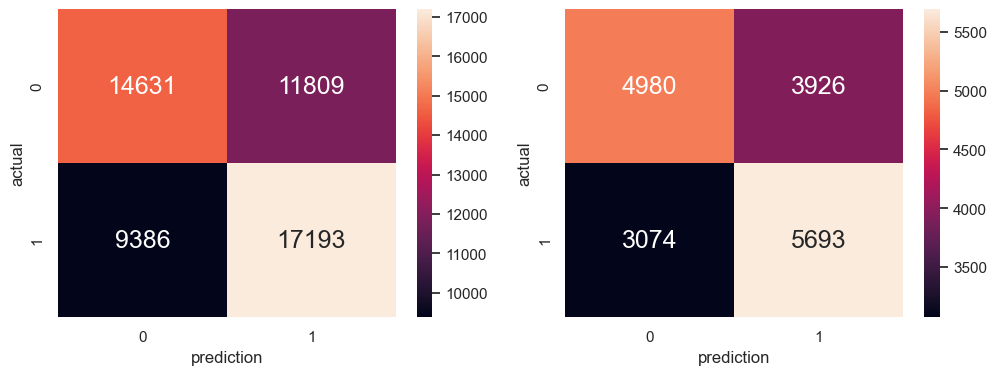

In [79]:
diabetes_income_train_pred = rf_model.predict(income_train)
print("Train Set:")
# Calculate accuracy
accuracy = accuracy_score(diabetes_income_train, diabetes_income_train_pred)
print("Accuracy:", accuracy)
# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_income_train, diabetes_income_train_pred))


diabetes_income_test_pred = rf_model.predict(income_test)
print("Test Set:")
# Calculate accuracy
accuracy = accuracy_score(diabetes_income_test, diabetes_income_test_pred)
print("Accuracy:", accuracy)
# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_income_test, diabetes_income_test_pred))

cfm(diabetes_income_train, diabetes_income_train_pred, diabetes_income_test, diabetes_income_test_pred)

Comparing `GenHlth`, `Age` and `Income`:

Within the **Train** dataset, 
1. `GenHlth`, `Age` and `Income` have accuracies of **68%**, **62%** and **60%** 
2. `GenHlth`, `Age` and `Income` have **65%**, **59%** and **58%** for F1 scores for _no diabetes_
3. `GenHlth`, `Age` and `Income` have **71%**, **64%** and **62%** for F1 scores for _have diabetes_

Within the **Test** dataset,
1. `GenHlth`, `Age` and `Income` have accuracies of **69%**, **62%** and **60%** 
2. `GenHlth`, `Age` and `Income` have **65%**, **59%** and **59%** for F1 scores for _no diabetes_
3. `GenHlth`, `Age` and `Income` have **72%**, **64%** and **62%** for F1 scores for _have diabetes_

This implies that `GenHlth` is the most accurate predictor and is able to correctly identify the **diabetic** patients while making the least misclassifications of **non-diabetic** as **diabetic**.    
Meanwhile, both `Age` & `Income` only have a moderate performance in terms of accuracy as well as identifying **diabetic** and **non-diabetic** as its F1 scores are not as high as `GenHlth`.    
Overall, `GenHlth` is the **best categorical predictor** in the diabetic dataset to predict whether a person is **diabetic _correctly_**

# Conclusion

Through our analysis, we identified three variables that were the most significant, one from each category. `BMI` was the most significant **numerical** factor, `HighBP` was the most significant **binary** factor, while `GenHlth` was the most significant **one-hot encoded data**. These three variables are closely linked together. `GenHlth` is a survey of how one perceives their own health status, which can be affected by **many factors such as weight, amount of exercise put in by the individual, as well as diet**. These factors are all closely linked to `BMI` and `HighBP` as well. A lack of exercise and unhealthy eating habits could lead to a _higher BMI_ and a _higher blood pressure_. These are all factors that can _affect a person's general health_. Hence, our group has concluded that to decrease diabetes risk factors, a healthy lifestyle that includes **exercise** and **healthy eating habits** which improves **general health** is essential to lowering intrinsic factors such as `BMI` and `HighBP` that can _**increase the risk of diabetes**_.